If you are only interested in the graphs/outputs, toggle this button here :)

In [1]:
from IPython.display import HTML
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, FloatSlider


def hide_code():
    return HTML('''
        <script>
            code_show = true; 
            function code_toggle() {
                if (code_show){
                    $('div.input').hide();
                } else {
                    $('div.input').show();
                }
                code_show = !code_show
            } 
            $(document).ready(code_toggle);
        </script>
        <form action="javascript:code_toggle()"><input type="submit" value="Click here to hide/show code."></form>
    ''')

hide_code()

# Power Recycled Michelson Notes


## Basic Structure


![alt text](prm_nofb.jpg)

## Fabry-Perot Arms

![alt text](fbarm.jpeg)

### Relevant Equations

#### Variables

$t_1$, $t_2 =$ the transmission coefficients of the mirrors \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- the real transmissivities are given by $T_1 = |t_1|^2$ \
$r_1$, $r_2 =$ the reflection coefficients of the mirrors \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- the real reflectivities are given by $R_1 = |r_1|^2$ \
$\phi =$ the phase shift aquired after one trip through the cavity \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- $\phi$ can be defined in two ways: \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\phi = 2kL$ where, \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$k = \frac{2\pi}{\lambda}$ \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$L =$ the length of the cavity \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\phi = \frac{2\pi\nu}{c}L$ where, \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\nu =$ the frequency the laser has moved by 

#### Solving for the E-Fields

As shown in diagram 2, there are 5 electric fields we can solve for: \
<br />
$$E_{in} = E_{in}$$
$$E_{cav} = t_1E_{in}+r_1e^{i\phi}E_{cav2}$$
$$E_{cav2} = r_2e^{i\phi}E_{cav}$$
$$E_{trans} = t_2e^{i\phi}E_{cav}$$
$$E_{refl} = -r_1E_{in}+t_1e^{i\phi}E_{cav2}$$
<br />
With these expressions, we can solve for the transfer functions of the transmitted and reflected beams: 
<br />

$$\frac{E_{refl}}{E_{in}} = -r_1+\frac{t_1^{2}r_2e^{2i\phi}}{1-r_1r_2e^{2i\phi}}$$
$$\frac{E_{trans}}{E_{in}} = \frac{t_1t_2e^{i\phi}}{1-r_1r_2e^{2i\phi}}$$

### Plotting Fabry - Perot Graphs

In [2]:
# Constants
frequency = np.linspace(-10e3, 10e5, 10000)
L = 3994.5 # ligo length of cavity
P_in = 2.0 # Input power (in watts)
phi = (2 * np.pi * frequency * L) / 3e8 # Propogation Term of Carrier Beam

# Defining E_refl / E_in
def E_refl_func(r_1, r_2,phi) :
    t_1 = np.sqrt( 1-r_1**2 )
    t_2 = np.sqrt( 1-r_2**2 )

    denom = 1 - r_1 * r_2 * np.exp(2j*phi)
    num = r_1 - (r_1**2 + t_1**2) * r_2 * np.exp(2j*phi)
    
    return num/denom

# Defining E_trans / E_in
def E_trans_func(r_1, r_2,phi) :
    t_1 = np.sqrt( 1-r_1**2 )
    t_2 = np.sqrt( 1-r_2**2 )
    
    denom = 1 - r_1 * r_2 * np.exp(2j*phi)
    num = t_1 * t_2 * np.exp(1j*phi)
                         
    return num/denom

def update_plot(r_1, r_2):
    t_FP = E_trans_func(r_1, r_2, phi)
    r_FP = E_refl_func(r_1, r_2, phi)
    
    P_refl = P_in * np.abs(r_FP)**2
    P_trans = P_in * np.abs(t_FP)**2
    P_tot = P_refl[2]+P_trans[2]
    
    plt.figure(figsize=(10, 4))
    plt.plot(frequency, np.abs(r_FP), 'b', label=f'Reflected E-Field')
    plt.plot(frequency, np.abs(t_FP), 'r', label=f'Transmitted E-Field')
    plt.title('Fabry-Perot Bode Plot')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(10, 4))
    plt.plot(frequency, P_refl, 'r', label='Reflected Power')
    plt.plot(frequency, P_trans, label='Transmitted Power')
    plt.plot(frequency, P_refl + P_trans, label=f'Total Power={P_tot}')
    plt.title('Fabry-Perot Power Conservation Check')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power (Watts)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Interactive plot with sliders
interact(update_plot, 
         r_1 = widgets.FloatSlider(min=0, max=1, step=0.1, value=0.5),
         r_2 = widgets.FloatSlider(min=0, max=1, step=0.1, value=0.5))


interactive(children=(FloatSlider(value=0.5, description='r_1', max=1.0), FloatSlider(value=0.5, description='…

<function __main__.update_plot(r_1, r_2)>

### Plotting Sideband Lasers

In [3]:
# Constants
phase = np.linspace(-np.pi, np.pi, 100000)
P_in = 2.0
L = 3994.5 
phi = phase

T1 = 0.05 # tranmissivity of mirrors
T2 = 0.05

r_1 = np.sqrt(1 - T1) # reflection coefficients
r_2 = np.sqrt(1 - T2)
t_1 = np.sqrt(T1) # transmission coefficients
t_2 = np.sqrt(T2)

# Solving for E_refl / E_in
def E_refl_func(phi) :
    t_1 = np.sqrt( 1-r_1**2 )
    t_2 = np.sqrt( 1-r_2**2 )

    denom = 1 - r_1 * r_2 * np.exp(2j*phi)
    num = r_1 - (r_1**2 + t_1**2) * r_2 * np.exp(2j*phi)
    
    return num/denom

# Solving for E_trans / E_in
def E_trans_func(phi) :
    t_1 = np.sqrt( 1-r_1**2 )
    t_2 = np.sqrt( 1-r_2**2 )
    
    denom = 1 - r_1 * r_2 * np.exp(2j*phi)
    num = t_1 * t_2 * np.exp(1j*phi)
                         
    return num/denom

def update_plot(sideband1, sideband2, sideband3):
    t_FP = E_trans_func(phi)
    r_FP = E_refl_func(phi)
    
    sb1 = (2*np.pi*sideband1*L)/3e8
    sb2 = (2*np.pi*sideband2*L)/3e8
    sb3 = (2*np.pi*sideband3*L)/3e8

    phi_s1 = phase+sb1
    phi_s2 = phase+sb2
    phi_s3 = phase+sb3
    
    s1_FP = E_refl_func(phi_s1)
    s2_FP = E_refl_func(phi_s2)
    s3_FP = E_refl_func(phi_s3)
    
    P_refl = P_in * np.abs(r_FP)**2
    P_trans = P_in * np.abs(t_FP)**2
    P_tot = P_refl[2]+P_trans[2]
    
    plt.figure(figsize=(10, 4))
    plt.plot(phase, np.abs(r_FP), 'b', label=f'Reflected E-Field')
    plt.plot(phase, np.abs(t_FP), 'r', label=f'Transmitted E-Field')
    plt.plot(phase, np.abs(s1_FP), label=f'{sideband1/1e6}Mhz sideband')
    plt.plot(phase, np.abs(s2_FP), label=f'{sideband2/1e6} Mhz sideband')
    plt.plot(phase, np.abs(s3_FP), label=f'{sideband3/1e6} Mhz sideband')
    plt.title('Fabry-Perot Bode Plot')
    plt.xlabel('Phase(radians)')
    plt.ylabel('Magnitude')
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(10, 4))
    plt.plot(phase, P_refl, 'r', label='Reflected Power')
    plt.plot(phase, P_trans, label='Transmitted Power')
    plt.plot(phase, P_refl + P_trans, label=f'Total Power={P_tot}')
    plt.title('Fabry-Perot Power Conservation Check')
    plt.xlabel('Phase(radians))')
    plt.ylabel('Power (Watts)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Interactive plot with sliders
interact(update_plot,
         sideband1 = widgets.FloatSlider(min=5e6, max=15e6, step=0.1e6, value=9.1e6),
         sideband2 = widgets.FloatSlider(min=30e6, max=60e6, step=0.5e6, value=45.5e6),
         sideband3 = widgets.FloatSlider(min=0e6, max=10e6, step=0.5e6, value=5e6))


interactive(children=(FloatSlider(value=9100000.0, description='sideband1', max=15000000.0, min=5000000.0, ste…

<function __main__.update_plot(sideband1, sideband2, sideband3)>

Nothing is resonant in the arms except carrier :D

###  Plotting End Mirror Modulation

In [4]:
# Constants
frequency = np.linspace(-10e3, 10e4, 10000)
L = 3994.5
P_in = 2.0 # Input power (in watts)
phi = (2 * np.pi * frequency * L) / 3e8 # Propogation Term of Carrier Beam

T1 = 0.05 # tranmissivity of mirrors
T2 = 0.05

r_1 = np.sqrt(1 - T1) # reflection coefficients
r_2 = np.sqrt(1 - T2)
t_1 = np.sqrt(T1) # transmission coefficients
t_2 = np.sqrt(T2)

# Defining E_refl / E_in
def E_refl_func(phi, phi_x) :

    denom = 1 - r_1 * r_2 * np.exp(2j*(phi+phi_x))
    num = r_1 - (r_1**2 + t_1**2) * r_2 * np.exp(2j*(phi+phi_x))
    
    return (num/denom)

# Defining E_trans / E_in
def E_trans_func(phi, phi_x) :
    
    denom = 1 - r_1 * r_2 * np.exp(2j*(phi+phi_x))
    num = t_1 * t_2 * np.exp(1j*(phi+phi_x))
    
    return (num/denom)

def update_plot(delta_x):
    phi_x = (2 * np.pi * frequency * (delta_x)) / 3e8
    
    t_FP = E_trans_func(phi, phi_x)
    r_FP = E_refl_func(phi, phi_x)
    
    P_refl = P_in * np.abs(r_FP)**2
    P_trans = P_in * np.abs(t_FP)**2
    P_tot = P_refl[2]+P_trans[2]
    
    plt.figure(figsize=(10, 4))
    plt.plot(frequency, np.abs(r_FP), 'b', label=f'Reflected E-Field')
    plt.plot(frequency, np.abs(t_FP), 'r', label=f'Transmitted E-Field')

    plt.title('Fabry-Perot Bode Plot')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(10, 4))
    plt.plot(frequency, P_refl, 'r', label='Reflected Power')
    plt.plot(frequency, P_trans, label='Transmitted Power')
    plt.plot(frequency, P_refl + P_trans, label=f'Total Power={P_tot}')
    plt.title('Fabry-Perot Power Conservation Check')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power (Watts)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Interactive plot with sliders
interact(update_plot, 
         delta_x = widgets.FloatSlider(min=-0.001e3, max=0.001e3, step=0.0001e3, value=0))


interactive(children=(FloatSlider(value=0.0, description='delta_x', max=1.0, min=-1.0), Output()), _dom_classe…

<function __main__.update_plot(delta_x)>

It doesn't change really :D

## Michelson Basics

![alt text](prm_nofba.jpeg)

### Relevant Equations


#### Variables

For the most part, we can remain consistent with the variables we used before, with some changes: \
<br />
There are now 3 $\phi$ terms: \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- $\phi_p = \frac{2\pi\nu}{c}L_p$ \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- $\phi_x = \frac{2\pi\nu}{c}L_x$ \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- $\phi_y = \frac{2\pi\nu}{c}L_y$

#### Solving for the E-Fields

$$E_{in} = E_{in}$$
$$E_1 = -t_1E_{in} - r_1e^{i\phi_p}E_2$$
$$E_2 = t_2e^{i\phi_x}E_4 + r2e^{i\phi_y}E_6$$
$$E_3 = -t_2e^{i\phi_p}E_1$$
$$E_4 = r_3e^{i\phi_x}E_3$$
$$E_5 = r_2e^{i\phi_p}E_1$$
$$E_6 = r_4e^{i\phi_y}E_5$$
$$E_{refl} = r_1E_{in} + t_1e^{i\phi_p}E_2$$
$$E_{trans} = -r_2e^{i\phi_x}E_4 - t_2e^{i\phi_y}E_6$$

To solve for the transfer functions, we can rewrite this information in the form of an adjacency matrix and solve that.

#### Adjacency Matrix

$$
\begin{pmatrix}
 & E_{in} & E_1 & E_3 & E_5 & E_2 & E_4 & E_6 & E_{refl} & E_{trans}\\
E_{in} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
E_1 & t_1 & 0 & 0 & 0 & -r_1e^{i\phi_p} & 0 & 0 & 0 & 0\\
E_3 & 0 & t_2e^{i\phi_p} & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
E_5 & 0 & r_2e^{i\phi_p} & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
E_2 & 0 & 0 & 0 & 0 & 0 & -t_2e^{i\phi_x} & r_2e^{i\phi_y} & 0 & 0 \\
E_4 & 0 & 0 & r_2e^{i\phi_x} & 0 & 0 & 0 & 0 & 0 & 0\\
E_6 & 0 & 0 & 0 & r_4e^{i\phi_y} & 0 & 0 & 0 & 0 & 0\\
E_{refl} & r_1 & 0 & 0 & 0 & -t_1e^{i\phi_p} & 0 & 0 & 0 & 0\\
E_{trans} & 0 & 0 & 0 & 0 & 0 & -r_2e^{i\phi_x} & t_2e^{i\phi_y} & 0 & 0
\end{pmatrix}
$$

Solved Matrix($G = (I - M)^{-1}$):

In [5]:
i=sp.I #imaginary unit
r = [sp.symbols(f"r_{idx+1}") for idx in range(4)]
t = [sp.symbols(f"t_{idx+1}") for idx in range(4)]

phi_p = sp.symbols(('\\phi_p'))
phi_x = sp.symbols(('\\phi_x'))
phi_y = sp.symbols(('\\phi_y'))


x = sp.symbols(('x'))

TF = sp.Matrix([[0,0,0,0,0,0,0,0,0,0],
                [t[0]*sp.exp(i*phi_p),0,r[0]*sp.exp(i*phi_p),0,0,0,0,0,0,0],
                [0,0,0,0,t[1]*sp.exp(i*phi_p),0,r[1]*sp.exp(i*phi_p),0,0,0],
                [0,t[1]*sp.exp(i*phi_x),0,0,0,0,0,0,0,-r[1]*sp.exp(i*phi_x)],
                [0,0,0,r[2]*sp.exp(i*phi_x),0,0,0,0,0,0],
                [0,r[1]*sp.exp(i*phi_y),0,0,0,0,0,0,0,t[1]*sp.exp(i*phi_y)],
                [0,0,0,0,0,r[3]*sp.exp(i*phi_y),0,0,0,0],
                [-r[0],0,t[0],0,0,0,0,0,0,0],
                [0,0,0,0,-r[1],0,t[1],0,0,0],
                [0,0,0,0,0,0,0,0,0,0]])
display(TF)

Matrix([
[                0,                 0,                 0,                 0,                 0,                 0,                 0, 0, 0,                  0],
[t_1*exp(I*\phi_p),                 0, r_1*exp(I*\phi_p),                 0,                 0,                 0,                 0, 0, 0,                  0],
[                0,                 0,                 0,                 0, t_2*exp(I*\phi_p),                 0, r_2*exp(I*\phi_p), 0, 0,                  0],
[                0, t_2*exp(I*\phi_x),                 0,                 0,                 0,                 0,                 0, 0, 0, -r_2*exp(I*\phi_x)],
[                0,                 0,                 0, r_3*exp(I*\phi_x),                 0,                 0,                 0, 0, 0,                  0],
[                0, r_2*exp(I*\phi_y),                 0,                 0,                 0,                 0,                 0, 0, 0,  t_2*exp(I*\phi_y)],
[                0,      

In [6]:
I = sp.eye(10)
result = (I-TF).inv()

$\frac{E_{refl}}{E_{in}} =$

In [7]:
E_refl = sp.simplify(result[7,0])
display(E_refl)

(-r_1**2*r_2**2*r_4*exp(2*I*(\phi_p + \phi_y)) - r_1**2*r_3*t_2**2*exp(2*I*(\phi_p + \phi_x)) + r_1 - r_2**2*r_4*t_1**2*exp(2*I*(\phi_p + \phi_y)) - r_3*t_1**2*t_2**2*exp(2*I*(\phi_p + \phi_x)))/(r_1*r_2**2*r_4*exp(2*I*(\phi_p + \phi_y)) + r_1*r_3*t_2**2*exp(2*I*(\phi_p + \phi_x)) - 1)

In [8]:
#r_1, t_1, r_2, phi = sp.symbols('r_1 t_1 r_2 phi')

#num = (r_1 - (r_1**2 + t_1**2) * r_2 * sp.exp(2*i*phi)) / (1 - r_1 * r_2 * sp.exp(2*i*phi))
#num = (r_1 - (r_1**2 + t_1**2) * r_2 * (sp.cos(phi)+i*sp.sin(phi))) / (1 - r_1 * r_2 * (sp.cos(phi)+i*sp.sin(phi)))
#num = (-r_1 + r_2 * (sp.cos(2*phi)+i*sp.sin(2*phi)))/(1 - r_1 * r_2 * (sp.cos(2*phi)+i*sp.sin(2*phi)))
#dif = sp.simplify(sp.diff(num, phi))
#display(num)

In [9]:
#phi = np.pi
#def func(phi):
#    num = -2j*r_2*t_1**2*np.exp(2j*phi)/(r_1**2*r_2**2*np.exp(4j*phi) - 2*r_1*r_2*np.exp(2j*phi) + 1)
#    return num
#func = sp.simplify(func(np.pi))
#display(func)

In [10]:
#print(np.real(func))

$\frac{E_{trans}}{E_{in}} =$

In [11]:
E_trans = sp.simplify(result[8,0])
display(E_trans)

r_2*t_1*t_2*(r_3*exp(I*(\phi_p + 2*\phi_x)) - r_4*exp(I*(\phi_p + 2*\phi_y)))/(r_1*r_2**2*r_4*exp(2*I*(\phi_p + \phi_y)) + r_1*r_3*t_2**2*exp(2*I*(\phi_p + \phi_x)) - 1)

In [12]:
E_sr = sp.simplify(result[7,9])
print(E_sr)

r_2*t_1*t_2*(r_3*exp(I*(\phi_p + 2*\phi_x)) - r_4*exp(I*(\phi_p + 2*\phi_y)))/(r_1*r_2**2*r_4*exp(2*I*(\phi_p + \phi_y)) + r_1*r_3*t_2**2*exp(2*I*(\phi_p + \phi_x)) - 1)


### Graphing Michelson with Fabry Perot Arm Modulation

In [13]:
# Constants
Lp = 57.6508 # Length from PRM to BS 
Lx = 5# length from BS to arms
Ly = 5

r_FP1 = 0.707
r_FP2 = 1


P_in = 2 # Input power in Watts

# Defining E_refl / E_in
def E_refl_func(r,t,phi_x,phi_y,phi_p, q1, q2) :
    t_1,t_2 = t
    r_1,r_2 = r

    denom = r_1*r_2**2*q2*np.exp(2j*(phi_p+phi_y))+r_1*q1*t_2**2*np.exp(2j*(phi_p+phi_x))-1
    num = -r_1**2*r_2**2*q2*np.exp(2j*(phi_p+phi_y))-r_1**2*q1*t_2**2*np.exp(2j*(phi_p+phi_x))+r_1-r_2**2*q2*t_1**2*np.exp(2j*(phi_p+phi_y))-q1*t_1**2*t_2**2*np.exp(2j*(phi_p+phi_x))
    
    return num/denom

# Defining E_trans / E_in
def E_trans_func(r,t,phi_x,phi_y,phi_p, q1, q2) :
    t_1,t_2 = t
    r_1,r_2 = r
    
    denom = r_1*r_2**2*q2*np.exp(2j*(phi_p+phi_y))+r_1*q1*t_2**2*np.exp(2j*(phi_p+phi_x))-1
    num = r_2*t_1*t_2*(q1*np.exp(1j*(phi_p+2*phi_x)) - q2*np.exp(1j*(phi_p+2*phi_y)))
                         
    return num/denom

frequency = np.linspace(-10e3, 10e5, 10000)

def update_plot(FPx, FPy):
    
    theta_x = (2*np.pi*frequency*FPx)/3e8
    theta_y = (2*np.pi*frequency*FPy)/3e8
    
    q1 = (-r_FP1 + r_FP2 * np.exp(2j*theta_x))/(1 - r_FP1 * r_FP2 * np.exp(2j*theta_x)) # reflectivity of fp arms
    q2 = (-r_FP1 + r_FP2 * np.exp(2j*theta_y))/(1 - r_FP1 * r_FP2 * np.exp(2j*theta_y))
    
    
    r = np.array([0.5,0.707]) # Array of reflectivities
    t = np.sqrt( 1-r**2 ) # Solution to transmisivities

    t_MI = E_trans_func(r,t,(2*np.pi*frequency*Lx)/3e8,(2*np.pi*frequency*Ly)/3e8,(2*np.pi*frequency*Lp)/3e8, q1, q2)
    r_MI = E_refl_func(r,t,(2*np.pi*frequency*Lx)/3e8,(2*np.pi*frequency*Ly)/3e8,(2*np.pi*frequency*Lp)/3e8, q1, q2)
    
    P_refl = P_in * np.abs(r_MI)**2
    P_trans = P_in * np.abs(t_MI)**2
    P_tot = P_refl[2]+P_trans[2]
    
    plt.figure(figsize=(10, 4))
    plt.plot(frequency, np.abs(r_MI), 'b', label=f'|r|')
    plt.plot(frequency, np.abs(t_MI), 'r', label=f'|t|')
    plt.title('Power Recycled Michelson Bode Plot')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(10, 4))
    plt.plot(frequency, P_refl, 'r', label='Reflected Power')
    plt.plot(frequency, P_trans, label='Transmitted Power')
    plt.plot(frequency, P_refl + P_trans, label=f'Total Power={P_tot}')
    plt.title('Power Conservation Check')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power (Watts)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Interactive plot with sliders
interact(update_plot, FPx=widgets.FloatSlider(min=3993.5, max=3995.5, step=0.5, value=3994.5),
         FPy=widgets.FloatSlider(min=3993.5, max=3995.5, step=0.5, value=3994.5))


interactive(children=(FloatSlider(value=3994.5, description='FPx', max=3995.5, min=3993.5, step=0.5), FloatSli…

<function __main__.update_plot(FPx, FPy)>

### Plotting Michelson with Sideband Lasers

In [14]:
# Constants
L = 57.6508 # Length from PRM to BS 

r = np.array([0.5,0.707,1,1]) # Array of reflectivities
t = np.sqrt( 1-r**2 ) # Solution to transmisivities
P_in = 2 # Input power in Watts

# Defining E_refl / E_in
def E_refl_func(r,t,phi_x,phi_y,phi_p) :
    t_1,t_2,t_3,t_4 = t
    r_1,r_2,r_3,r_4 = r

    denom = (r_1*r_2**2*r_4*np.exp(2j*(phi_p + phi_y)) + r_1*r_3*t_2**2*np.exp(2j*(phi_p + phi_x)) - 1)
    num = (-r_1**2*r_2**2*r_4*np.exp(2j*(phi_p + phi_y)) - r_1**2*r_3*t_2**2*np.exp(2j*(phi_p + phi_x)) + r_1 - r_2**2*r_4*t_1**2*np.exp(2j*(phi_p + phi_y)) - r_3*t_1**2*t_2**2*np.exp(2j*(phi_p + phi_x)))
    
    return num/denom

# Defining E_trans / E_in
def E_trans_func(r,t,phi_x,phi_y,phi_p) :
    t_1,t_2,t_3,t_4 = t
    r_1,r_2,r_3,r_4 = r
    
    denom = (r_1*r_2**2*r_4*np.exp(2j*(phi_p + phi_y)) + r_1*r_3*t_2**2*np.exp(2j*(phi_p + phi_x)) - 1)
    num = r_2*t_1*t_2*(r_3*np.exp(1j*(phi_p + 2*phi_x)) - r_4*np.exp(1j*(phi_p + 2*phi_y)))
                        
    return num/denom

def E_sideband(r,t,phi_x,phi_y,phi_p) :
    t_1,t_2,t_3,t_4 = t
    r_1,r_2,r_3,r_4 = r

    denom = (r_1*r_2**2*r_4*np.exp(2j*(phi_p + phi_y)) + r_1*r_3*t_2**2*np.exp(2j*(phi_p + phi_x)) - 1)
    num = r_2*t_1*t_2*(r_3*np.exp(1j*(phi_p + 2*phi_x)) - r_4*np.exp(1j*(phi_p + 2*phi_y)))
                        
    return num/denom

phase = np.linspace(-np.pi, np.pi, 10000)

def update_plot(SB1, SB2, SB3):
    t_MI = E_trans_func(r,t,phase,0,0)
    r_MI = E_refl_func(r,t,phase,0,0)
    
    sb1 = (2*np.pi*SB1*L)/3e8
    sb2 = (2*np.pi*SB2*L)/3e8
    sb3 = (2*np.pi*SB3*L)/3e8
    
    s1_MI = E_refl_func(r,t,phase+sb1,0,0)
    s2_MI = E_refl_func(r,t,phase+sb2,0,0)
    s3_MI = E_sideband(r,t,phase+sb3,0,0)
    
    P_refl = P_in * np.abs(r_MI)**2
    P_trans = P_in * np.abs(t_MI)**2
    P_tot = P_refl[2]+P_trans[2]
    
    plt.figure(figsize=(10, 4))
    plt.plot(phase, np.abs(r_MI), 'b', label=f'|r|')
    plt.plot(phase, np.abs(t_MI), 'r', label=f'|t|')
    plt.plot(phase, np.abs(s1_MI), label=f'{SB1/1e6} MHz sideband')
    plt.plot(phase, np.abs(s2_MI), label=f'{SB2/1e6} MHz sideband')
    plt.plot(phase, np.abs(s3_MI), label=f'{SB3/1e6} MHz sideband')
    plt.title('Power Recycled Michelson Bode Plot')
    plt.xlabel('Phase(radians)')
    plt.ylabel('Magnitude')
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(10, 4))
    plt.plot(phase, P_refl, 'r', label='Reflected Power')
    plt.plot(phase, P_trans, label='Transmitted Power')
    plt.plot(phase, P_refl + P_trans, label=f'Total Power={P_tot}')
    plt.title('Power Conservation Check')
    plt.xlabel('Phase (radia)')
    plt.ylabel('Power (Watts)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Interactive plot with sliders
interact(update_plot,
         SB1=widgets.FloatSlider(min=5e6, max=15e6, step=0.1e6, value=9.1e6),
         SB2=widgets.FloatSlider(min=30e6, max=60e6, step=0.1e6, value=45.5e6),
         SB3=widgets.FloatSlider(min=0e6, max=9e6, step=0.1e6, value=5e6))


interactive(children=(FloatSlider(value=9100000.0, description='SB1', max=15000000.0, min=5000000.0, step=1000…

<function __main__.update_plot(SB1, SB2, SB3)>

## Signal Recycled Michelson

### Relevant Equations

Adjacency Matrix

In [15]:
i=sp.I #imaginary unit
r = [sp.symbols(f"r_{idx+1}") for idx in range(5)]
t = [sp.symbols(f"t_{idx+1}") for idx in range(5)]

phi_p = sp.symbols(('\\phi_p'))
phi_x = sp.symbols(('\\phi_x'))
phi_y = sp.symbols(('\\phi_y'))
phi_s = sp.symbols(('\\phi_s'))


x = sp.symbols(('x'))

TF = sp.Matrix([[0,0,0,0,0,0,0,0,0,0,0],
                [t[0]*sp.exp(i*phi_p),0,r[0]*sp.exp(i*phi_p),0,0,0,0,0,0,0,0],
                [0,0,0,0,t[1]*sp.exp(i*phi_p),0,r[1]*sp.exp(i*phi_p),0,0,0,0],
                [0,t[1]*sp.exp(i*phi_x),0,0,0,0,0,0,-r[1]*sp.exp(i*phi_x),0,0],
                [0,0,0,r[2]*sp.exp(i*phi_x),0,0,0,0,0,0,0],
                [0,r[1]*sp.exp(i*phi_y),0,0,0,0,0,0,t[1]*sp.exp(i*phi_y),0,0],
                [0,0,0,0,0,r[3]*sp.exp(i*phi_y),0,0,0,0,0],
                [0,0,0,0,-r[1]*sp.exp(i*phi_s),0,t[1]*sp.exp(i*phi_s),0,0,0,0],
                [0,0,0,0,0,0,0,r[4]*sp.exp(i*phi_s),0,0,0],
                [-r[0],0,t[0],0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,t[4],0,0,0]])
display(TF)

Matrix([
[                0,                 0,                 0,                 0,                  0,                 0,                 0,                 0,                  0, 0, 0],
[t_1*exp(I*\phi_p),                 0, r_1*exp(I*\phi_p),                 0,                  0,                 0,                 0,                 0,                  0, 0, 0],
[                0,                 0,                 0,                 0,  t_2*exp(I*\phi_p),                 0, r_2*exp(I*\phi_p),                 0,                  0, 0, 0],
[                0, t_2*exp(I*\phi_x),                 0,                 0,                  0,                 0,                 0,                 0, -r_2*exp(I*\phi_x), 0, 0],
[                0,                 0,                 0, r_3*exp(I*\phi_x),                  0,                 0,                 0,                 0,                  0, 0, 0],
[                0, r_2*exp(I*\phi_y),                 0,                 0,          

In [16]:
I = sp.eye(11)
result = (I-TF).inv()

E_refl = 

In [17]:
E_refl = sp.simplify(result[9,0])
display(E_refl)

(-r_1**2*r_2**4*r_3*r_4*r_5*exp(2*I*(\phi_p + \phi_s + \phi_x + \phi_y)) - 2*r_1**2*r_2**2*r_3*r_4*r_5*t_2**2*exp(2*I*(\phi_p + \phi_s + \phi_x + \phi_y)) + r_1**2*r_2**2*r_4*exp(2*I*(\phi_p + \phi_y)) - r_1**2*r_3*r_4*r_5*t_2**4*exp(2*I*(\phi_p + \phi_s + \phi_x + \phi_y)) + r_1**2*r_3*t_2**2*exp(2*I*(\phi_p + \phi_x)) + r_1*r_2**2*r_3*r_5*exp(2*I*(\phi_s + \phi_x)) + r_1*r_4*r_5*t_2**2*exp(2*I*(\phi_s + \phi_y)) - r_1 - r_2**4*r_3*r_4*r_5*t_1**2*exp(2*I*(\phi_p + \phi_s + \phi_x + \phi_y)) - 2*r_2**2*r_3*r_4*r_5*t_1**2*t_2**2*exp(2*I*(\phi_p + \phi_s + \phi_x + \phi_y)) + r_2**2*r_4*t_1**2*exp(2*I*(\phi_p + \phi_y)) - r_3*r_4*r_5*t_1**2*t_2**4*exp(2*I*(\phi_p + \phi_s + \phi_x + \phi_y)) + r_3*t_1**2*t_2**2*exp(2*I*(\phi_p + \phi_x)))/(r_1*r_2**4*r_3*r_4*r_5*exp(2*I*(\phi_p + \phi_s + \phi_x + \phi_y)) + 2*r_1*r_2**2*r_3*r_4*r_5*t_2**2*exp(2*I*(\phi_p + \phi_s + \phi_x + \phi_y)) - r_1*r_2**2*r_4*exp(2*I*(\phi_p + \phi_y)) + r_1*r_3*r_4*r_5*t_2**4*exp(2*I*(\phi_p + \phi_s + \phi_x + 

E_trans =

In [18]:
E_trans = sp.simplify(result[10,0])
display(E_trans)

r_2*t_1*t_2*t_5*(-r_3*exp(I*(\phi_p + \phi_s + 2*\phi_x)) + r_4*exp(I*(\phi_p + \phi_s + 2*\phi_y)))/(r_1*r_2**4*r_3*r_4*r_5*exp(2*I*(\phi_p + \phi_s + \phi_x + \phi_y)) + 2*r_1*r_2**2*r_3*r_4*r_5*t_2**2*exp(2*I*(\phi_p + \phi_s + \phi_x + \phi_y)) - r_1*r_2**2*r_4*exp(2*I*(\phi_p + \phi_y)) + r_1*r_3*r_4*r_5*t_2**4*exp(2*I*(\phi_p + \phi_s + \phi_x + \phi_y)) - r_1*r_3*t_2**2*exp(2*I*(\phi_p + \phi_x)) - r_2**2*r_3*r_5*exp(2*I*(\phi_s + \phi_x)) - r_4*r_5*t_2**2*exp(2*I*(\phi_s + \phi_y)) + 1)

In [19]:
# Constants
Lp = 3e3 # Length from PRM to BS 
Ls = 3e3

r = np.array([0.5,0.707,1,1,0.707]) # Array of reflectivities
t = np.sqrt( 1-r**2 ) # Solution to transmisivities
P_in = 2 # Input power in Watts

# Solving for E_refl / E_in
def E_refl_func(r,t,phi_x,phi_y,phi_p,phi_s) :
    t_1,t_2,t_3,t_4,t_5 = t
    r_1,r_2,r_3,r_4,r_5 = r

    denom = (r_1*r_2**4*r_3*r_4*r_5*np.exp(2j*(phi_p + phi_s + phi_x + phi_y)) + 2*r_1*r_2**2*r_3*r_4*r_5*t_2**2*np.exp(2j*(phi_p + phi_s + phi_x + phi_y)) - r_1*r_2**2*r_4*np.exp(2j*(phi_p + phi_y)) + r_1*r_3*r_4*r_5*t_2**4*np.exp(2j*(phi_p + phi_s + phi_x + phi_y)) - r_1*r_3*t_2**2*np.exp(2j*(phi_p + phi_x)) - r_2**2*r_3*r_5*np.exp(2j*(phi_s + phi_x)) - r_4*r_5*t_2**2*np.exp(2j*(phi_s + phi_y)) + 1)
    num = (-r_1**2*r_2**4*r_3*r_4*r_5*np.exp(2j*(phi_p + phi_s + phi_x + phi_y)) - 2*r_1**2*r_2**2*r_3*r_4*r_5*t_2**2*np.exp(2j*(phi_p + phi_s + phi_x + phi_y)) + r_1**2*r_2**2*r_4*np.exp(2j*(phi_p + phi_y)) - r_1**2*r_3*r_4*r_5*t_2**4*np.exp(2j*(phi_p + phi_s + phi_x + phi_y)) + r_1**2*r_3*t_2**2*np.exp(2j*(phi_p + phi_x)) + r_1*r_2**2*r_3*r_5*np.exp(2j*(phi_s + phi_x)) + r_1*r_4*r_5*t_2**2*np.exp(2j*(phi_s + phi_y)) - r_1 - r_2**4*r_3*r_4*r_5*t_1**2*np.exp(2j*(phi_p + phi_s + phi_x + phi_y)) - 2*r_2**2*r_3*r_4*r_5*t_1**2*t_2**2*np.exp(2j*(phi_p + phi_s + phi_x + phi_y)) + r_2**2*r_4*t_1**2*np.exp(2j*(phi_p + phi_y)) - r_3*r_4*r_5*t_1**2*t_2**4*np.exp(2j*(phi_p + phi_s + phi_x + phi_y)) + r_3*t_1**2*t_2**2*np.exp(2j*(phi_p + phi_x)))
    
    return num/denom

# Solving for E_trans / E_in
def E_trans_func(r,t,phi_x,phi_y,phi_p,phi_s) :
    t_1,t_2,t_3,t_4,t_5 = t
    r_1,r_2,r_3,r_4,r_5 = r
    
    denom = (r_1*r_2**4*r_3*r_4*r_5*np.exp(2j*(phi_p + phi_s + phi_x + phi_y)) + 2*r_1*r_2**2*r_3*r_4*r_5*t_2**2*np.exp(2j*(phi_p + phi_s + phi_x + phi_y)) - r_1*r_2**2*r_4*np.exp(2j*(phi_p + phi_y)) + r_1*r_3*r_4*r_5*t_2**4*np.exp(2j*(phi_p + phi_s + phi_x + phi_y)) - r_1*r_3*t_2**2*np.exp(2j*(phi_p + phi_x)) - r_2**2*r_3*r_5*np.exp(2j*(phi_s + phi_x)) - r_4*r_5*t_2**2*np.exp(2j*(phi_s + phi_y)) + 1)
    num = r_2*t_1*t_2*t_5*(-r_3*np.exp(1j*(phi_p + phi_s + 2*phi_x)) + r_4*np.exp(1j*(phi_p + phi_s + 2*phi_y)))
                         
    return num/denom

frequency = np.linspace(-10e3, 10e5, 10000)

def update_plot(Lx, Ly):
    t_MI = E_trans_func(r,t,(2*np.pi*frequency*Lx)/3e8,(2*np.pi*frequency*Ly)/3e8,(2*np.pi*frequency*Lp)/3e8,(2*np.pi*frequency*Ls)/3e8)
    r_MI = E_refl_func(r,t,(2*np.pi*frequency*Lx)/3e8,(2*np.pi*frequency*Ly)/3e8,(2*np.pi*frequency*Lp)/3e8,(2*np.pi*frequency*Ls)/3e8)
    
    P_refl = P_in * np.abs(r_MI)**2
    P_trans = P_in * np.abs(t_MI)**2
    P_tot = P_refl[2]+P_trans[2]
    
    plt.figure(figsize=(10, 4))
    plt.plot(frequency, np.abs(r_MI), 'b', label=f'|r|')
    plt.plot(frequency, np.abs(t_MI), 'r', label=f'|t|')
    plt.title('Signal Recycled Michelson Bode Plot')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid()
    plt.legend()
    plt.tight_layout()
    #plt.show()
    
    plt.figure(figsize=(10, 4))
    plt.plot(frequency, P_refl, 'r', label='Reflected Power')
    plt.plot(frequency, P_trans, label='Transmitted Power')
    plt.plot(frequency, P_refl + P_trans, label=f'Total Power={P_tot}')
    plt.title('Power Conservation Check')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power (Watts)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Interactive plot with sliders
interact(update_plot, Lx=widgets.FloatSlider(min=1e3, max=6e3, step=5, value=3e3),
         Ly=widgets.FloatSlider(min=1e3, max=6e3, step=5, value=3e3))


interactive(children=(FloatSlider(value=3000.0, description='Lx', max=6000.0, min=1000.0, step=5.0), FloatSlid…

<function __main__.update_plot(Lx, Ly)>

In [20]:
# Constants
#L = 6.753 # Length from SRM to BS 
L = 56

r = np.array([0.5,0.707,1,1,0.707]) # Array of reflectivities
t = np.sqrt( 1-r**2 ) # Solution to transmisivities
P_in = 2 # Input power in Watts

# Solving for E_refl / E_in
def E_refl_func(r,t,phi_x,phi_y,phi_p,phi_s) :
    t_1,t_2,t_3,t_4,t_5 = t
    r_1,r_2,r_3,r_4,r_5 = r

    denom = (r_1*r_2**4*r_3*r_4*r_5*np.exp(2j*(phi_p + phi_s + phi_x + phi_y)) + 2*r_1*r_2**2*r_3*r_4*r_5*t_2**2*np.exp(2j*(phi_p + phi_s + phi_x + phi_y)) - r_1*r_2**2*r_4*np.exp(2j*(phi_p + phi_y)) + r_1*r_3*r_4*r_5*t_2**4*np.exp(2j*(phi_p + phi_s + phi_x + phi_y)) - r_1*r_3*t_2**2*np.exp(2j*(phi_p + phi_x)) - r_2**2*r_3*r_5*np.exp(2j*(phi_s + phi_x)) - r_4*r_5*t_2**2*np.exp(2j*(phi_s + phi_y)) + 1)
    num = (-r_1**2*r_2**4*r_3*r_4*r_5*np.exp(2j*(phi_p + phi_s + phi_x + phi_y)) - 2*r_1**2*r_2**2*r_3*r_4*r_5*t_2**2*np.exp(2j*(phi_p + phi_s + phi_x + phi_y)) + r_1**2*r_2**2*r_4*np.exp(2j*(phi_p + phi_y)) - r_1**2*r_3*r_4*r_5*t_2**4*np.exp(2j*(phi_p + phi_s + phi_x + phi_y)) + r_1**2*r_3*t_2**2*np.exp(2j*(phi_p + phi_x)) + r_1*r_2**2*r_3*r_5*np.exp(2j*(phi_s + phi_x)) + r_1*r_4*r_5*t_2**2*np.exp(2j*(phi_s + phi_y)) - r_1 - r_2**4*r_3*r_4*r_5*t_1**2*np.exp(2j*(phi_p + phi_s + phi_x + phi_y)) - 2*r_2**2*r_3*r_4*r_5*t_1**2*t_2**2*np.exp(2j*(phi_p + phi_s + phi_x + phi_y)) + r_2**2*r_4*t_1**2*np.exp(2j*(phi_p + phi_y)) - r_3*r_4*r_5*t_1**2*t_2**4*np.exp(2j*(phi_p + phi_s + phi_x + phi_y)) + r_3*t_1**2*t_2**2*np.exp(2j*(phi_p + phi_x)))
    return num/denom

# Solving for E_trans / E_in
def E_trans_func(r,t,phi_x,phi_y,phi_p,phi_s) :
    t_1,t_2,t_3,t_4,t_5 = t
    r_1,r_2,r_3,r_4,r_5 = r
    
    denom = (r_1*r_2**4*r_3*r_4*r_5*np.exp(2j*(phi_p + phi_s + phi_x + phi_y)) + 2*r_1*r_2**2*r_3*r_4*r_5*t_2**2*np.exp(2j*(phi_p + phi_s + phi_x + phi_y)) - r_1*r_2**2*r_4*np.exp(2j*(phi_p + phi_y)) + r_1*r_3*r_4*r_5*t_2**4*np.exp(2j*(phi_p + phi_s + phi_x + phi_y)) - r_1*r_3*t_2**2*np.exp(2j*(phi_p + phi_x)) - r_2**2*r_3*r_5*np.exp(2j*(phi_s + phi_x)) - r_4*r_5*t_2**2*np.exp(2j*(phi_s + phi_y)) + 1)
    num = r_2*t_1*t_2*t_5*(-r_3*np.exp(1j*(phi_p + phi_s + 2*phi_x)) + r_4*np.exp(1j*(phi_p + phi_s + 2*phi_y)))
                         
    return num/denom

frequency = np.linspace(-np.pi, np.pi, 10000)

def update_plot(SB1, SB2):
    t_MI = E_trans_func(r,t,frequency,0,np.pi/2,np.pi/2)
    r_MI = E_refl_func(r,t,frequency,0,np.pi/2,np.pi/2)
    
    sb1 = (2*np.pi*SB1*L)/3e8
    sb2 = (2*np.pi*SB2*L)/3e8
    
    s1_MI = E_refl_func(r,t,frequency+sb1,0,np.pi/2, np.pi/2)
    s2_MI = E_refl_func(r,t,frequency+sb2,0,np.pi/2, np.pi/2)
    
    P_refl = P_in * np.abs(r_MI)**2
    P_trans = P_in * np.abs(t_MI)**2
    P_tot = P_refl[2]+P_trans[2]
    
    plt.figure(figsize=(10, 4))
    plt.plot(frequency, np.abs(r_MI), 'b', label=f'|r|')
    plt.plot(frequency, np.abs(t_MI), 'r', label=f'|t|')
    plt.plot(frequency, np.abs(s1_MI), label=f'{SB1/1e6} MHz sideband')
    plt.plot(frequency, np.abs(s2_MI), label=f'{SB2/1e6} MHz sideband')
    plt.title('Signal Recycled Michelson Bode Plot')
    plt.xlabel('Phase(radians)')
    plt.ylabel('Magnitude')
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(10, 4))
    plt.plot(frequency, P_refl, 'r', label='Reflected Power')
    plt.plot(frequency, P_trans, label='Transmitted Power')
    plt.plot(frequency, P_refl + P_trans, label=f'Total Power={P_tot}')
    plt.title('Power Conservation Check')
    plt.xlabel('Phase (radians)')
    plt.ylabel('Power (Watts)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Interactive plot with sliders
interact(update_plot,
         SB1=widgets.FloatSlider(min=5e6, max=15e6, step=0.1e6, value=9.1e6),
         SB2=widgets.FloatSlider(min=30e6, max=60e6, step=0.1e6, value=45.5e6))


interactive(children=(FloatSlider(value=9100000.0, description='SB1', max=15000000.0, min=5000000.0, step=1000…

<function __main__.update_plot(SB1, SB2)>

Solving for the new sideband laser:

In [21]:
i=sp.I #imaginary unit
r = [sp.symbols(f"r_{idx+1}") for idx in range(5)]
t = [sp.symbols(f"t_{idx+1}") for idx in range(5)]

phi_p = sp.symbols(('\\phi_p'))
phi_x = sp.symbols(('\\phi_x'))
phi_y = sp.symbols(('\\phi_y'))
phi_s = sp.symbols(('\\phi_s'))


x = sp.symbols(('x'))

TF = sp.Matrix([[0,0,0,0,0,0,0,0,0,0,0,0],
                [t[0]*sp.exp(i*phi_p),0,r[0]*sp.exp(i*phi_p),0,0,0,0,0,0,0,0,0],
                [0,0,0,0,t[1]*sp.exp(i*phi_p),0,r[1]*sp.exp(i*phi_p),0,0,0,0,0],
                [0,t[1]*sp.exp(i*phi_x),0,0,0,0,0,0,-r[1]*sp.exp(i*phi_x),0,0,0],
                [0,0,0,r[2]*sp.exp(i*phi_x),0,0,0,0,0,0,0,0],
                [0,r[1]*sp.exp(i*phi_y),0,0,0,0,0,0,t[1]*sp.exp(i*phi_y),0,0,0],
                [0,0,0,0,0,r[3]*sp.exp(i*phi_y),0,0,0,0,0,0],
                [0,0,0,0,-r[1]*sp.exp(i*phi_s),0,t[1]*sp.exp(i*phi_s),0,0,0,0,0],
                [0,0,0,0,0,0,0,r[4]*sp.exp(i*phi_s),0,0,0,t[4]*sp.exp(i*phi_s)],
                [-r[0],0,t[0],0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,t[4],0,0,0,-r[4]],
                [0,0,0,0,0,0,0,0,0,0,0,0]])
display(TF)

Matrix([
[                0,                 0,                 0,                 0,                  0,                 0,                 0,                 0,                  0, 0, 0,                 0],
[t_1*exp(I*\phi_p),                 0, r_1*exp(I*\phi_p),                 0,                  0,                 0,                 0,                 0,                  0, 0, 0,                 0],
[                0,                 0,                 0,                 0,  t_2*exp(I*\phi_p),                 0, r_2*exp(I*\phi_p),                 0,                  0, 0, 0,                 0],
[                0, t_2*exp(I*\phi_x),                 0,                 0,                  0,                 0,                 0,                 0, -r_2*exp(I*\phi_x), 0, 0,                 0],
[                0,                 0,                 0, r_3*exp(I*\phi_x),                  0,                 0,                 0,                 0,                  0, 0, 0,            

In [22]:
I = sp.eye(12)
result = (I-TF).inv()

In [23]:
Es_refl = sp.simplify(result[10,11])
display(Es_refl)

(-r_1*r_2**4*r_3*r_4*r_5**2*exp(2*I*(\phi_p + \phi_s + \phi_x + \phi_y)) - r_1*r_2**4*r_3*r_4*t_5**2*exp(2*I*(\phi_p + \phi_s + \phi_x + \phi_y)) - 2*r_1*r_2**2*r_3*r_4*r_5**2*t_2**2*exp(2*I*(\phi_p + \phi_s + \phi_x + \phi_y)) - 2*r_1*r_2**2*r_3*r_4*t_2**2*t_5**2*exp(2*I*(\phi_p + \phi_s + \phi_x + \phi_y)) + r_1*r_2**2*r_4*r_5*exp(2*I*(\phi_p + \phi_y)) - r_1*r_3*r_4*r_5**2*t_2**4*exp(2*I*(\phi_p + \phi_s + \phi_x + \phi_y)) - r_1*r_3*r_4*t_2**4*t_5**2*exp(2*I*(\phi_p + \phi_s + \phi_x + \phi_y)) + r_1*r_3*r_5*t_2**2*exp(2*I*(\phi_p + \phi_x)) + r_2**2*r_3*r_5**2*exp(2*I*(\phi_s + \phi_x)) + r_2**2*r_3*t_5**2*exp(2*I*(\phi_s + \phi_x)) + r_4*r_5**2*t_2**2*exp(2*I*(\phi_s + \phi_y)) + r_4*t_2**2*t_5**2*exp(2*I*(\phi_s + \phi_y)) - r_5)/(r_1*r_2**4*r_3*r_4*r_5*exp(2*I*(\phi_p + \phi_s + \phi_x + \phi_y)) + 2*r_1*r_2**2*r_3*r_4*r_5*t_2**2*exp(2*I*(\phi_p + \phi_s + \phi_x + \phi_y)) - r_1*r_2**2*r_4*exp(2*I*(\phi_p + \phi_y)) + r_1*r_3*r_4*r_5*t_2**4*exp(2*I*(\phi_p + \phi_s + \phi_x + 

In [24]:
# Constants
#L = 6.753 # Length from SRM to BS 
L = 56

r = np.array([0.5,0.707,1,1,0.7]) # Array of reflectivities
t = np.sqrt( 1-r**2 ) # Solution to transmisivities
P_in = 2 # Input power in Watts

# Solving for E_refl / E_in
def E_refl_func(r,t,phi_x,phi_y,phi_p,phi_s) :
    t_1,t_2,t_3,t_4,t_5 = t
    r_1,r_2,r_3,r_4,r_5 = r

    denom = (r_1*r_2**4*r_3*r_4*r_5*np.exp(2j*(phi_p + phi_s + phi_x + phi_y)) + 2*r_1*r_2**2*r_3*r_4*r_5*t_2**2*np.exp(2j*(phi_p + phi_s + phi_x + phi_y)) - r_1*r_2**2*r_4*np.exp(2j*(phi_p + phi_y)) + r_1*r_3*r_4*r_5*t_2**4*np.exp(2j*(phi_p + phi_s + phi_x + phi_y)) - r_1*r_3*t_2**2*np.exp(2j*(phi_p + phi_x)) - r_2**2*r_3*r_5*np.exp(2j*(phi_s + phi_x)) - r_4*r_5*t_2**2*np.exp(2j*(phi_s + phi_y)) + 1)
    num = (-r_1**2*r_2**4*r_3*r_4*r_5*np.exp(2j*(phi_p + phi_s + phi_x + phi_y)) - 2*r_1**2*r_2**2*r_3*r_4*r_5*t_2**2*np.exp(2j*(phi_p + phi_s + phi_x + phi_y)) + r_1**2*r_2**2*r_4*np.exp(2j*(phi_p + phi_y)) - r_1**2*r_3*r_4*r_5*t_2**4*np.exp(2j*(phi_p + phi_s + phi_x + phi_y)) + r_1**2*r_3*t_2**2*np.exp(2j*(phi_p + phi_x)) + r_1*r_2**2*r_3*r_5*np.exp(2j*(phi_s + phi_x)) + r_1*r_4*r_5*t_2**2*np.exp(2j*(phi_s + phi_y)) - r_1 - r_2**4*r_3*r_4*r_5*t_1**2*np.exp(2j*(phi_p + phi_s + phi_x + phi_y)) - 2*r_2**2*r_3*r_4*r_5*t_1**2*t_2**2*np.exp(2j*(phi_p + phi_s + phi_x + phi_y)) + r_2**2*r_4*t_1**2*np.exp(2j*(phi_p + phi_y)) - r_3*r_4*r_5*t_1**2*t_2**4*np.exp(2j*(phi_p + phi_s + phi_x + phi_y)) + r_3*t_1**2*t_2**2*np.exp(2j*(phi_p + phi_x)))
    
    return num/denom

def Es_refl_func(r,t,phi_x,phi_y,phi_p,phi_s) :
    t_1,t_2,t_3,t_4,t_5 = t
    r_1,r_2,r_3,r_4,r_5 = r

    denom = (r_1*r_2**4*r_3*r_4*r_5*np.exp(2j*(phi_p + phi_s + phi_x + phi_y)) + 2*r_1*r_2**2*r_3*r_4*r_5*t_2**2*np.exp(2j*(phi_p + phi_s + phi_x + phi_y)) - r_1*r_2**2*r_4*np.exp(2j*(phi_p + phi_y)) + r_1*r_3*r_4*r_5*t_2**4*np.exp(2j*(phi_p + phi_s + phi_x + phi_y)) - r_1*r_3*t_2**2*np.exp(2j*(phi_p + phi_x)) - r_2**2*r_3*r_5*np.exp(2j*(phi_s + phi_x)) - r_4*r_5*t_2**2*np.exp(2j*(phi_s + phi_y)) + 1)
    num = r_2*t_1*t_2*t_5*(-r_3*np.exp(1j*(phi_p + phi_s + 2*phi_x)) + r_4*np.exp(1j*(phi_p + phi_s + 2*phi_y)))
    
    return num/denom

# Solving for E_trans / E_in
def E_trans_func(r,t,phi_x,phi_y,phi_p,phi_s) :
    t_1,t_2,t_3,t_4,t_5 = t
    r_1,r_2,r_3,r_4,r_5 = r
    
    denom = (r_1*r_2**4*r_3*r_4*r_5*np.exp(2j*(phi_p + phi_s + phi_x + phi_y)) + 2*r_1*r_2**2*r_3*r_4*r_5*t_2**2*np.exp(2j*(phi_p + phi_s + phi_x + phi_y)) - r_1*r_2**2*r_4*np.exp(2j*(phi_p + phi_y)) + r_1*r_3*r_4*r_5*t_2**4*np.exp(2j*(phi_p + phi_s + phi_x + phi_y)) - r_1*r_3*t_2**2*np.exp(2j*(phi_p + phi_x)) - r_2**2*r_3*r_5*np.exp(2j*(phi_s + phi_x)) - r_4*r_5*t_2**2*np.exp(2j*(phi_s + phi_y)) + 1)
    num = r_2*t_1*t_2*t_5*(-r_3*np.exp(1j*(phi_p + phi_s + 2*phi_x)) + r_4*np.exp(1j*(phi_p + phi_s + 2*phi_y)))
                         
    return num/denom

frequency = np.linspace(0, 2*np.pi, 10000)

def update_plot(SB1, SB2, SB3):
    t_MI = E_trans_func(r,t,frequency,0,np.pi/2,np.pi/2)
    r_MI = E_refl_func(r,t,frequency,0,np.pi/2,np.pi/2)
    
    sb1 = (2*np.pi*SB1*L)/3e8
    sb2 = (2*np.pi*SB2*L)/3e8
    sb3 = (2*np.pi*SB3*L)/3e8
    
    s1_MI = E_refl_func(r,t,frequency+sb1,0,np.pi/2, np.pi/2)
    s2_MI = E_refl_func(r,t,frequency+sb2,0,np.pi/2, np.pi/2)
    s3_MI = Es_refl_func(r,t,frequency+sb3,0,np.pi/2, np.pi/2)
    
    P_refl = P_in * np.abs(r_MI)**2
    P_trans = P_in * np.abs(t_MI)**2
    P_tot = P_refl[2]+P_trans[2]
    
    plt.figure(figsize=(10, 4))
    plt.plot(frequency, np.abs(r_MI), 'b', label=f'|r|')
    plt.plot(frequency, np.abs(t_MI), 'r', label=f'|t|')
    plt.plot(frequency, np.abs(s1_MI), label=f'{SB1/1e6} MHz sideband')
    plt.plot(frequency, np.abs(s2_MI), label=f'{SB2/1e6} MHz sideband')
    plt.plot(frequency, np.abs(s3_MI), label=f'{SB3/1e6} MHz sideband')
    plt.title('Signal Recycled Michelson Bode Plot')
    plt.xlabel('Phase (radians)')
    plt.ylabel('Magnitude')
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(10, 4))
    plt.plot(frequency, P_refl, 'r', label='Reflected Power')
    plt.plot(frequency, P_trans, label='Transmitted Power')
    plt.plot(frequency, P_refl + P_trans, label=f'Total Power={P_tot}')
    plt.title('Power Conservation Check')
    plt.xlabel('Phase (radians)')
    plt.ylabel('Power (Watts)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Interactive plot with sliders
interact(update_plot,
         SB1=widgets.FloatSlider(min=5e6, max=15e6, step=0.1e6, value=9.1e6),
         SB2=widgets.FloatSlider(min=30e6, max=60e6, step=0.1e6, value=45.5e6),
         SB3=widgets.FloatSlider(min=5e6, max=15e6, step=0.5e6, value=5e6))


interactive(children=(FloatSlider(value=9100000.0, description='SB1', max=15000000.0, min=5000000.0, step=1000…

<function __main__.update_plot(SB1, SB2, SB3)>

Solving just for the signal recycling cavity:


In [25]:
i=sp.I #imaginary unit
r = [sp.symbols(f"r_{idx+1}") for idx in range(5)]
t = [sp.symbols(f"t_{idx+1}") for idx in range(5)]

phi_p = sp.symbols(('\\phi_p'))
phi_x = sp.symbols(('\\phi_x'))
phi_y = sp.symbols(('\\phi_y'))
phi_s = sp.symbols(('\\phi_s'))


x = sp.symbols(('x'))

TF = sp.Matrix([[0,0,0,0,0,0,0,0,0],
                [0,0,r[0]*sp.exp(i*phi_s),0,0,0,0,0,0],
                [0,0,0,0,t[1]*sp.exp(i*phi_s),0,-r[1]*sp.exp(i*phi_s),0,0],
                [r[1]*sp.exp(i*phi_y),t[1]*sp.exp(i*phi_y),0,0,0,0,0,0,0],
                [0,0,0,r[2]*sp.exp(i*phi_y),0,0,0,0,0],
                [t[1]*sp.exp(i*phi_x),-r[1]*sp.exp(i*phi_x),0,0,0,0,0,0,0],
                [0,0,0,0,0,r[3]*sp.exp(i*phi_x),0,0,0],
                [0,0,0,0,r[1],0,t[1],0,0],
                [0,0,t[0],0,0,0,0,0,0]])
display(TF)

Matrix([
[                0,                  0,                 0,                 0,                 0,                 0,                  0, 0, 0],
[                0,                  0, r_1*exp(I*\phi_s),                 0,                 0,                 0,                  0, 0, 0],
[                0,                  0,                 0,                 0, t_2*exp(I*\phi_s),                 0, -r_2*exp(I*\phi_s), 0, 0],
[r_2*exp(I*\phi_y),  t_2*exp(I*\phi_y),                 0,                 0,                 0,                 0,                  0, 0, 0],
[                0,                  0,                 0, r_3*exp(I*\phi_y),                 0,                 0,                  0, 0, 0],
[t_2*exp(I*\phi_x), -r_2*exp(I*\phi_x),                 0,                 0,                 0,                 0,                  0, 0, 0],
[                0,                  0,                 0,                 0,                 0, r_4*exp(I*\phi_x),                  

In [26]:
I = sp.eye(9)
result = (I-TF).inv()

In [27]:
E_refl = sp.simplify(result[7,0])
display(E_refl)

(r_1*r_2**4*r_3*r_4*exp(2*I*(\phi_s + \phi_x + \phi_y)) + 2*r_1*r_2**2*r_3*r_4*t_2**2*exp(2*I*(\phi_s + \phi_x + \phi_y)) + r_1*r_3*r_4*t_2**4*exp(2*I*(\phi_s + \phi_x + \phi_y)) - r_2**2*r_3*exp(2*I*\phi_y) - r_4*t_2**2*exp(2*I*\phi_x))/(r_1*r_2**2*r_4*exp(2*I*(\phi_s + \phi_x)) + r_1*r_3*t_2**2*exp(2*I*(\phi_s + \phi_y)) - 1)

In [28]:
E_trans = sp.simplify(result[8,0])
display(E_trans)

r_2*t_1*t_2*(-r_3*exp(I*(\phi_s + 2*\phi_y)) + r_4*exp(I*(\phi_s + 2*\phi_x)))/(r_1*r_2**2*r_4*exp(2*I*(\phi_s + \phi_x)) + r_1*r_3*t_2**2*exp(2*I*(\phi_s + \phi_y)) - 1)

In [29]:
# Constants
#L = 6.753 # Length from PRM to BS 
L = 56

r = np.array([0.5,0.707,1,1,0.7]) # Array of reflectivities
t = np.sqrt( 1-r**2 ) # Solution to transmisivities
P_in = 2 # Input power in Watts

# Solving for E_refl / E_in
def E_refl_func(r,t,phi_x,phi_y,phi_p,phi_s) :
    t_1,t_2,t_3,t_4,t_5 = t
    r_1,r_2,r_3,r_4,r_5 = r

    denom = (r_1*r_2**2*r_4*np.exp(2j*(phi_s + phi_x)) + r_1*r_3*t_2**2*np.exp(2j*(phi_s + phi_y)) - 1)
    num = (r_1*r_2**4*r_3*r_4*np.exp(2j*(phi_s + phi_x + phi_y)) + 2*r_1*r_2**2*r_3*r_4*t_2**2*np.exp(2j*(phi_s + phi_x + phi_y)) + r_1*r_3*r_4*t_2**4*np.exp(2j*(phi_s + phi_x + phi_y)) - r_2**2*r_3*np.exp(2j*phi_y) - r_4*t_2**2*np.exp(2j*phi_x))
    
    return num/denom

def Es_refl_func(r,t,phi_x,phi_y,phi_p,phi_s) :
    t_1,t_2,t_3,t_4,t_5 = t
    r_1,r_2,r_3,r_4,r_5 = r

    denom =  (r_1*r_2**2*r_4*np.exp(2j*(phi_s + phi_x)) + r_1*r_3*t_2**2*np.exp(2j*(phi_s + phi_y)) - 1)
    num = (-r_1**2*r_2**2*r_4*np.exp(2j*(phi_s + phi_x)) - r_1**2*r_3*t_2**2*np.exp(2j*(phi_s + phi_y)) + r_1 - r_2**2*r_4*t_1**2*np.exp(2j*(phi_s + phi_x)) - r_3*t_1**2*t_2**2*np.exp(2j*(phi_s + phi_y)))
    
    return num/denom

# Solving for E_trans / E_in
def E_trans_func(r,t,phi_x,phi_y,phi_p,phi_s) :
    t_1,t_2,t_3,t_4,t_5 = t
    r_1,r_2,r_3,r_4,r_5 = r
    
    denom = (r_1*r_2**2*r_4*np.exp(2j*(phi_s + phi_x)) + r_1*r_3*t_2**2*np.exp(2j*(phi_s + phi_y)) - 1)
    num = r_2*t_1*t_2*(-r_3*np.exp(1j*(phi_s + 2*phi_y)) + r_4*np.exp(1j*(phi_s + 2*phi_x)))
                         
    return num/denom

frequency = np.linspace(0, 2*np.pi, 10000)

def update_plot(SB1, SB2, SB3):
    t_MI = E_trans_func(r,t,frequency,0,np.pi/2,np.pi/2)
    r_MI = E_refl_func(r,t,frequency,0,np.pi/2,np.pi/2)
    
    sb1 = (2*np.pi*SB1*L)/3e8
    sb2 = (2*np.pi*SB2*L)/3e8
    sb3 = (2*np.pi*SB3*L)/3e8
    
    s1_MI = E_refl_func(r,t,frequency+sb1,0,np.pi/2, np.pi/2)
    s2_MI = E_refl_func(r,t,frequency+sb2,0,np.pi/2, np.pi/2)
    s3_MI = Es_refl_func(r,t,frequency+sb3,0,np.pi/2, np.pi/2)
    
    P_refl = P_in * np.abs(r_MI)**2
    P_trans = P_in * np.abs(t_MI)**2
    P_tot = P_refl[2]+P_trans[2]
    
    plt.figure(figsize=(10, 4))
    plt.plot(frequency, np.abs(r_MI), 'b', label=f'|r|')
    plt.plot(frequency, np.abs(t_MI), 'r', label=f'|t|')
    plt.plot(frequency, np.abs(s1_MI), label=f'{SB1/1e6} MHz sideband')
    plt.plot(frequency, np.abs(s2_MI), label=f'{SB2/1e6} MHz sideband')
    plt.plot(frequency, np.abs(s3_MI), label=f'{SB3/1e6} MHz sideband')
    plt.title('Signal Recycling Cavity Bode Plot')
    plt.xlabel('Phase (radians)')
    plt.ylabel('Magnitude')
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(10, 4))
    plt.plot(frequency, P_refl, 'r', label='Reflected Power')
    plt.plot(frequency, P_trans, label='Transmitted Power')
    plt.plot(frequency, P_refl + P_trans, label=f'Total Power={P_tot}')
    plt.title('Power Conservation Check')
    plt.xlabel('Phase (radians)')
    plt.ylabel('Power (Watts)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Interactive plot with sliders
interact(update_plot,
         SB1=widgets.FloatSlider(min=5e6, max=15e6, step=0.5e6, value=9e6),
         SB2=widgets.FloatSlider(min=30e6, max=60e6, step=0.5e6, value=45.5e6),
         SB3=widgets.FloatSlider(min=5e6, max=15e6, step=0.5e6, value=5e6))


interactive(children=(FloatSlider(value=9000000.0, description='SB1', max=15000000.0, min=5000000.0, step=5000…

<function __main__.update_plot(SB1, SB2, SB3)>

In [30]:
# Constants
Lp = 57.7 # Length from PRM to BS 
Lx = 2e3
Ly = 2e3
Ls = 56

r_FP1 = 0.707
r_FP2 = 1


P_in = 2 # Input power in Watts

# Solving for E_refl / E_in
def E_refl_func(r,t,phi_x,phi_y,phi_p, phi_s,q1, q2) :
    t_1,t_2 = t
    r_1,r_2 = r

    denom = (r_1*r_2**2*q2*np.exp(2j*(phi_s + phi_x)) + r_1*q1*t_2**2*np.exp(2j*(phi_s + phi_y)) - 1)
    num = (r_1*r_2**4*q1*q2*np.exp(2j*(phi_s + phi_x + phi_y)) + 2*r_1*r_2**2*q1*q2*t_2**2*np.exp(2j*(phi_s + phi_x + phi_y)) + r_1*q1*q2*t_2**4*np.exp(2j*(phi_s + phi_x + phi_y)) - r_2**2*q1*np.exp(2j*phi_y) - q2*t_2**2*np.exp(2j*phi_x))
    
    return num/denom

def Es_refl_func(r,t,phi_x,phi_y,phi_p, phi_s,q1, q2) :
    t_1,t_2 = t
    r_1,r_2 = r

    denom =  (r_1*r_2**2*q2*np.exp(2j*(phi_s + phi_x)) + r_1*q1*t_2**2*np.exp(2j*(phi_s + phi_y)) - 1)
    num = (-r_1**2*r_2**2*q2*np.exp(2j*(phi_s + phi_x)) - r_1**2*q1*t_2**2*np.exp(2j*(phi_s + phi_y)) + r_1 - r_2**2*q2*t_1**2*np.exp(2j*(phi_s + phi_x)) - q1*t_1**2*t_2**2*np.exp(2j*(phi_s + phi_y)))
    
    return num/denom

# Solving for E_trans / E_in
def E_trans_func(r,t,phi_x,phi_y,phi_p, phi_s,q1, q2) :
    t_1,t_2 = t
    r_1,r_2 = r
    
    denom = (r_1*r_2**2*q2*np.exp(2j*(phi_s + phi_x)) + r_1*q1*t_2**2*np.exp(2j*(phi_s + phi_y)) - 1)
    num = r_2*t_1*t_2*(-q1*np.exp(1j*(phi_s + 2*phi_y)) + q2*np.exp(1j*(phi_s + 2*phi_x)))
                            
    return num/denom

frequency = np.linspace(-10e3, 10e5, 10000)

def update_plot(FPx, FPy,sideband):
    
    theta_x = (2*np.pi*frequency*FPx)/3e8
    theta_y = (2*np.pi*frequency*FPy)/3e8
    
    #theta_x = 0
    #theta_y = 0
    
    q1 = (-r_FP1 + r_FP2 * np.exp(2j*theta_x))/(1 - r_FP1 * r_FP2 * np.exp(2j*theta_x))
    q2 = (-r_FP1 + r_FP2 * np.exp(2j*theta_y))/(1 - r_FP1 * r_FP2 * np.exp(2j*theta_y))
    
    
    r = np.array([0.5,0.707]) # Array of reflectivities
    t = np.sqrt( 1-r**2 ) # Solution to transmisivities

    t_MI = E_trans_func(r,t,(2*np.pi*frequency*Lx)/3e8,(2*np.pi*frequency*Ly)/3e8,(2*np.pi*frequency*Lp)/3e8, (2*np.pi*frequency*Ls)/3e8,q1, q2)
    r_MI = E_refl_func(r,t,(2*np.pi*frequency*Lx)/3e8,(2*np.pi*frequency*Ly)/3e8,(2*np.pi*frequency*Lp)/3e8, (2*np.pi*frequency*Ls)/3e8, q1, q2)
    
    s_MI = Es_refl_func(r,t,(2*np.pi*frequency+sideband*Lx)/3e8,(2*np.pi*frequency+sideband*Ly)/3e8,(2*np.pi*frequency+sideband*Lp)/3e8, (2*np.pi*frequency+sideband*Ls)/3e8, q1, q2)

    P_refl = P_in * np.abs(r_MI)**2
    P_trans = P_in * np.abs(t_MI)**2
    P_tot = P_refl[2]+P_trans[2]
    
    plt.figure(figsize=(10, 4))
    plt.plot(frequency, np.abs(r_MI), 'b', label=f'|r|')
    plt.plot(frequency, np.abs(t_MI), 'r', label=f'|t|')
    plt.plot(frequency, np.abs(s_MI), 'purple',label=f'sideband')
    plt.title('Signal Recycling Cavity Bode Plot')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(10, 4))
    plt.plot(frequency, P_refl, 'r', label='Reflected Power')
    plt.plot(frequency, P_trans, label='Transmitted Power')
    plt.plot(frequency, P_refl + P_trans, label=f'Total Power={P_tot}')
    plt.title('Power Conservation Check')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power (Watts)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Interactive plot with sliders
interact(update_plot, FPx=widgets.FloatSlider(min=3993.5, max=3995.5, step=0.5, value=3994.5),
         FPy=widgets.FloatSlider(min=3993.5, max=3995.5, step=0.5, value=3994.5),
         sideband=widgets.FloatSlider(min=5e6, max=15e6, step=0.5e6, value=5e6))


interactive(children=(FloatSlider(value=3994.5, description='FPx', max=3995.5, min=3993.5, step=0.5), FloatSli…

<function __main__.update_plot(FPx, FPy, sideband)>

# PDH Signals

## Fabry Perot

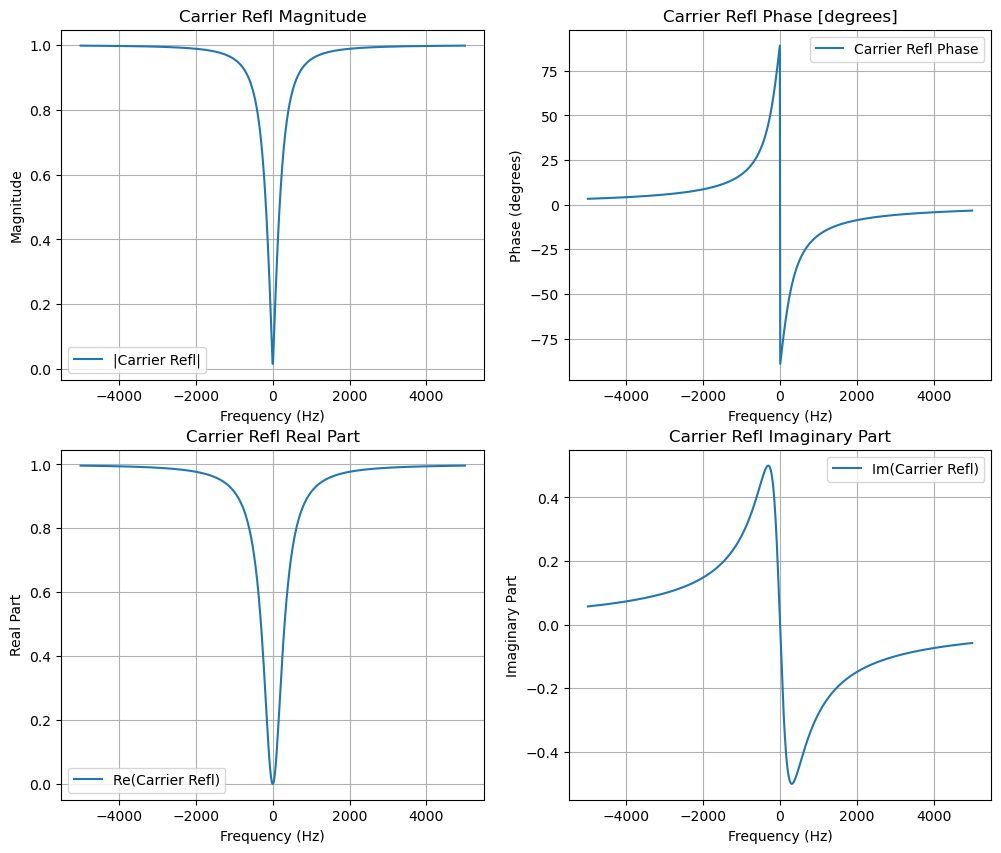

In [31]:
# Constants
frequency = np.linspace(-5e3, 5e3, 1000)
L = 3994.5
P_in = 2.0 # Input power (in watts)
c = 3e8  # speed of light

T1 = 0.05 # 5% transmission M1
T2 = 0.05 # 5% transmission M2
Atm = 0 # absorption percent M1
Apm = 0 # absorption percent M1

Gamma = 0.2 # modulation depth
E0 = 1 # E_in
J0 = 1 
Zeta = 0

r1 = np.sqrt(1 - T1 - Apm) # reflectivity M1
r2 = np.sqrt(1 - T2 - Atm) # reflectitivity M2
t1 = np.sqrt(T1) # trans M1
t2 = np.sqrt(T2) # trans M2

phi = ((2 * np.pi * frequency) / c) * L

# Solving for E_refl / E_in
def E_refl_func(phi) :
    
    denom = 1 - r1 * r2 * np.exp(2j*phi)
    num = r1 - (r1**2 + t1**2) * r2 * np.exp(2j*phi)
    
    return (num/denom)

r_FP = E_refl_func(phi)
    
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot magnitude
axs[0, 0].plot(frequency, np.abs(r_FP), label="|Carrier Refl|")
axs[0, 0].set_title("Carrier Refl Magnitude")
axs[0, 0].set_xlabel("Frequency (Hz)")
axs[0, 0].set_ylabel("Magnitude")
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot phase in degrees
axs[0, 1].plot(frequency, np.angle(r_FP, deg=True), label="Carrier Refl Phase")
axs[0, 1].set_title("Carrier Refl Phase [degrees]")
axs[0, 1].set_xlabel("Frequency (Hz)")
axs[0, 1].set_ylabel("Phase (degrees)")
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot real part
axs[1, 0].plot(frequency, np.real(r_FP), label="Re(Carrier Refl)")
axs[1, 0].set_title("Carrier Refl Real Part")
axs[1, 0].set_xlabel("Frequency (Hz)")
axs[1, 0].set_ylabel("Real Part")
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot imaginary part
axs[1, 1].plot(frequency, np.imag(r_FP), label="Im(Carrier Refl)")
axs[1, 1].set_title("Carrier Refl Imaginary Part")
axs[1, 1].set_xlabel("Frequency (Hz)")
axs[1, 1].set_ylabel("Imaginary Part")
axs[1, 1].legend()
axs[1, 1].grid(True)



### Shaking Frequency

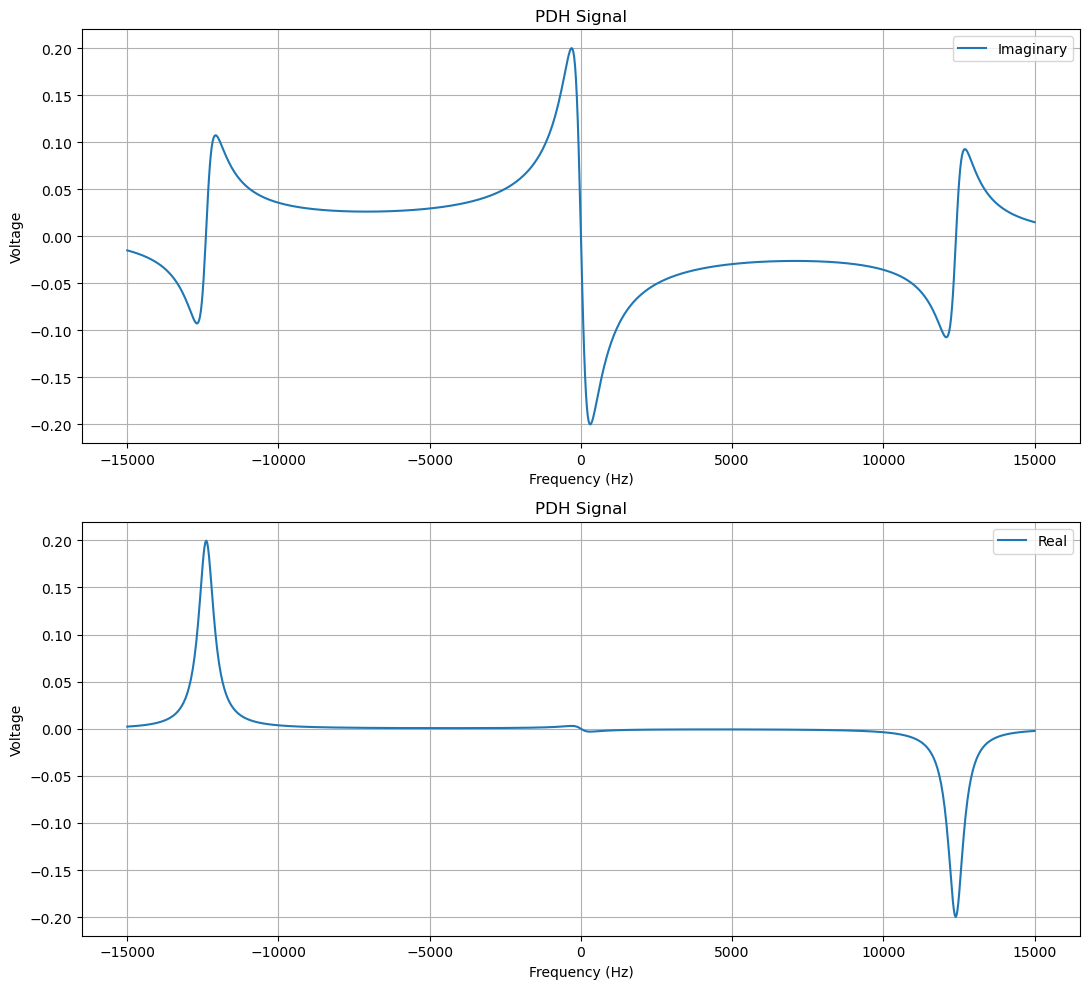

In [32]:
# Constants
J1 = Gamma / 2 
f = np.linspace(-15e3, 15e3, 1000) # larger freq range
fRF = 9e6 # sideband frequency

# Modulation
phi = ((2 * np.pi * f) / c) * L
phi_RF = ((2 * np.pi * fRF) / c) * L


r0c = np.conjugate(E_refl_func(phi))


def Prefl_im(A, B, zeta=0):
    # Calculate cos (with zeta=0)
    term1 = -2 * np.cos(zeta) * np.imag(A + B)
    term2 = -2 * np.real(A - B) * np.sin(zeta)
    
    return 0.5 * E0**2 * J0 * J1 * (term1 + term2)

def Prefl_re(A, B, zeta=0):
    # Calculate sin (with zeta=0)
    term1 = 2 * np.cos(zeta) * np.real(A - B)
    term2 = -2 * np.imag(A + B) * np.sin(zeta)
    
    return 0.5 * E0**2 * J0 * J1 * (term1 + term2)

# Plotting

phi_RF = ((2 * np.pi * fRF) / c) * L

# Phase Shift
phi_rm = phi_RF + phi # minus sideband
phi_rp = -phi_RF + phi# plus sideband

rmOmega = E_refl_func(phi_rm) # reflectivity minus
rpOmega = E_refl_func(phi_rp) # reflectivity plus

A = r0c * rmOmega
B = r0c * rpOmega

PreflOmega_cos_values = Prefl_im(A, B, zeta=0)
PreflOmega_sin_values = Prefl_re(A, B, zeta=0)


# Plotting
plt.figure(figsize=(11, 10))

# Plot PreflΩcos
plt.subplot(2, 1, 1)
plt.plot(f, P_in*PreflOmega_cos_values, label="Imaginary")
plt.title("PDH Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Voltage")
plt.legend()
plt.grid(True)

# Plot PreflΩsin
plt.subplot(2, 1, 2)
plt.plot(f, P_in*PreflOmega_sin_values, label="Real")
plt.title("PDH Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Voltage")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



### Shaking end mirror position

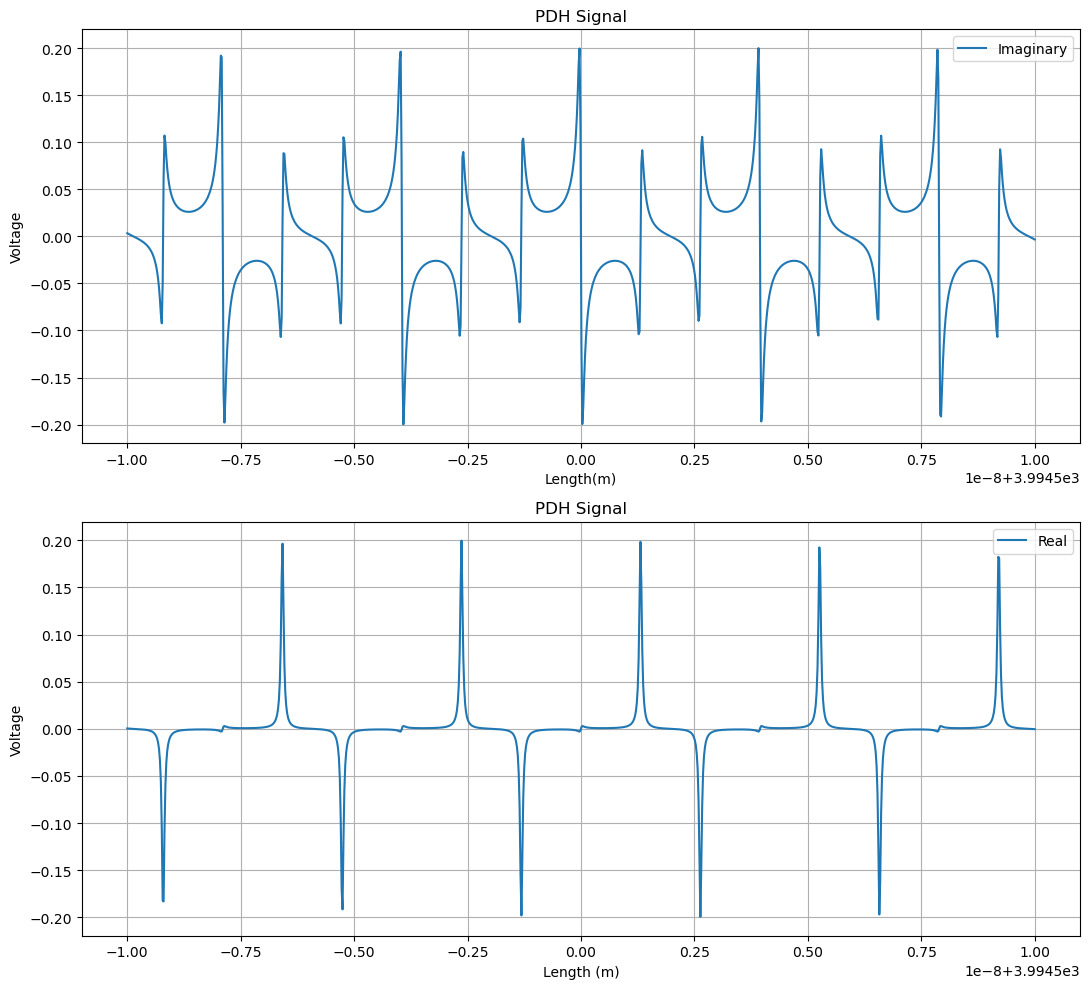

In [33]:
# Constants
J1 = Gamma / 2 
f = 3.8e16 # larger freq range
L = np.linspace(-1e-8+3994.5, 1e-8+3994.5, 1000)
fRF = 9.1e6 # sideband frequency

# Modulation
phi = ((2 * np.pi * f) / c) * L
phi_RF = ((2 * np.pi * fRF) / c) * L


r0c = np.conjugate(E_refl_func(phi))


def Prefl_im(A, B, zeta=0):
    # Calculate cos (with zeta=0)
    term1 = -2 * np.cos(zeta) * np.imag(A + B)
    term2 = -2 * np.real(A - B) * np.sin(zeta)
    
    return 0.5 * E0**2 * J0 * J1 * (term1 + term2)

def Prefl_re(A, B, zeta=0):
    # Calculate sin (with zeta=0)
    term1 = 2 * np.cos(zeta) * np.real(A - B)
    term2 = -2 * np.imag(A + B) * np.sin(zeta)
    
    return 0.5 * E0**2 * J0 * J1 * (term1 + term2)

# Plotting

# Phase Shift
phi_rm = -phi_RF + phi # minus sideband
phi_rp = phi_RF + phi# plus sideband

r0 = E_refl_func(phi)
rmOmega = E_refl_func(phi_rm) # reflectivity minus
rpOmega = E_refl_func(phi_rp) # reflectivity plus



A = r0c * rpOmega
B = r0c * rmOmega

PreflOmega_cos_values = Prefl_im(A, B, zeta=0)
PreflOmega_sin_values = Prefl_re(A, B, zeta=0)


# Plotting
plt.figure(figsize=(11, 10))

# Plot PreflΩcos
plt.subplot(2, 1, 1)
plt.plot(L, P_in*PreflOmega_cos_values, label="Imaginary")
plt.title("PDH Signal")
plt.xlabel("Length(m)")
plt.ylabel("Voltage")
plt.legend()
plt.grid(True)

# Plot PreflΩsin
plt.subplot(2, 1, 2)
plt.plot(L, P_in*PreflOmega_sin_values, label="Real")
plt.title("PDH Signal")
plt.xlabel("Length (m)")
plt.ylabel("Voltage")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
    

## Power Recycled Michelson

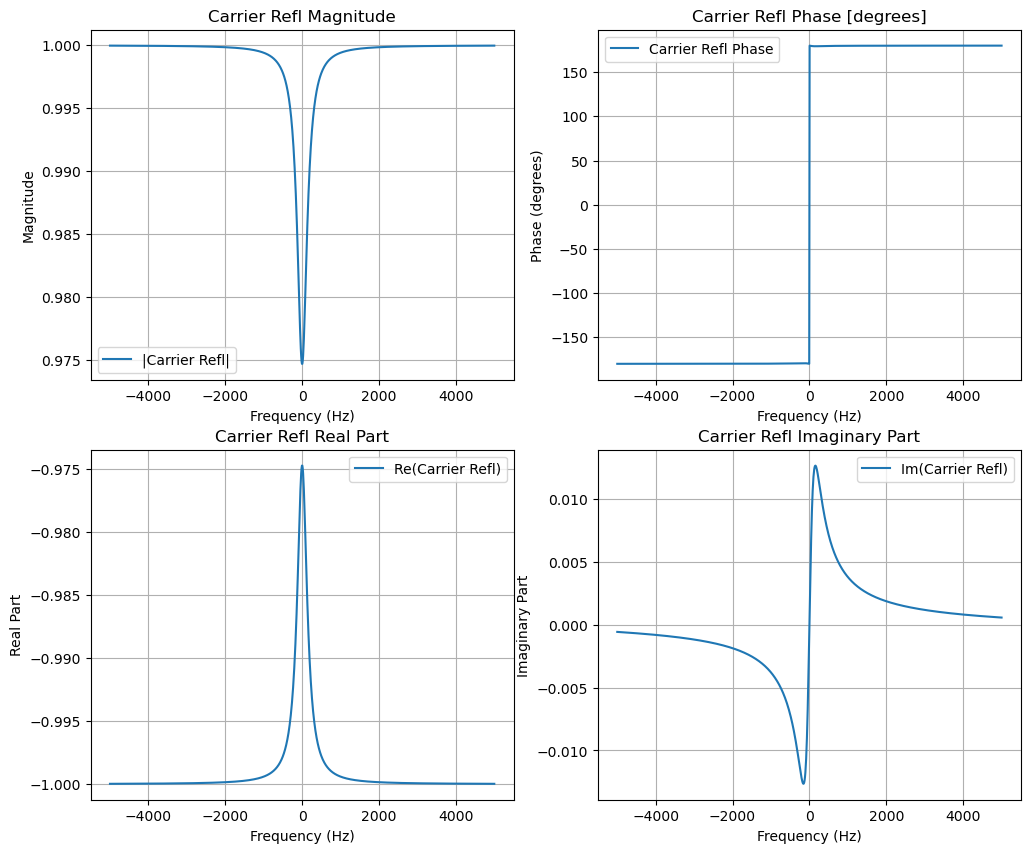

In [34]:
# Constants
frequency = np.linspace(-5e3, 5e3, 1000)

Lp = 57.6508 # Length from PRM to BS 
Lx = 5 # l_x
Ly = 5

FPx = 3994.5
FPy = 3994.5

P_in = 2.0 # Input power (in watts)
c = 3e8  # speed of light

T1 = 0.05 # 5% transmission M1
T2 = 0.05 # 5% transmission M2
T3 = 0.05 # 5% transmission M3, input FP
T4 = 0.05 # 5% transmission M4, end mirror FP

Atm = 0 # absorption percent M1
Apm = 0 # absorption percent M1

Gamma = 0.2 # modulation depth
E0 = 1 # E_in
J0 = 1 
Zeta = 0

r1 = np.sqrt(1 - T1 - Apm) # reflectivity M1
r2 = np.sqrt(1 - T2 - Atm) # reflectitivity M2
r3 = np.sqrt(1 - T3 - Apm) # reflectivity M1
r4 = np.sqrt(1 - T4 - Atm) # reflectitivity M2
t1 = np.sqrt(T1) # trans M1
t2 = np.sqrt(T2) # trans M2
t3 = np.sqrt(T3) # trans M1
t4 = np.sqrt(T4) # trans M2

theta_x = (2*np.pi*frequency*FPx)/3e8
theta_y = (2*np.pi*frequency*FPy)/3e8


phi_p = ((2 * np.pi * frequency) / c) * Lp
phi_x = ((2 * np.pi * frequency) / c) * Lx
phi_y = ((2 * np.pi * frequency) / c) * Ly

def E_refl_func(phi_x,phi_y,phi_p, theta_x, theta_y) :
    
    q1 = (-r3 + r4 * np.exp(2j*theta_x))/(1 - r3 * r4 * np.exp(2j*theta_x))
    q2 = (-r3+ r4 * np.exp(2j*theta_y))/(1 - r3 * r4 * np.exp(2j*theta_y))
    
    denom = (r1*r2**2*q2*np.exp(2j*(phi_p+phi_y)))+(r1*q1*t2**2*np.exp(2j*(phi_p+phi_x)))-1
    num = (-r1**2*r2**2*q2*np.exp(2j*(phi_p+phi_y)))-(r1**2*q1*t2**2*np.exp(2j*(phi_p+phi_x)))+(r1-r2**2*q2*t1**2*np.exp(2j*(phi_p+phi_y)))-(q1*t1**2*t2**2*np.exp(2j*(phi_p+phi_x)))
    
    #denom = r1*r2**2*(-r3+ r4 * np.exp(2j*theta_y))/(1 - r3 * r4 * np.exp(2j*theta_y))*np.exp(2j*(phi_p+phi_y))+r_1*(-r3 + r4 * np.exp(2j*theta_x))/(1 - r3 * r4 * np.exp(2j*theta_x))*t2**2*np.exp(2j*(phi_p+phi_x))-1
    #num = -r1**2*r2**2*(-r3+ r4 * np.exp(2j*theta_y))/(1 - r3 * r4 * np.exp(2j*theta_y))*np.exp(2j*(phi_p+phi_y))-r1**2*(-r3 + r4 * np.exp(2j*theta_x))/(1 - r3 * r4 * np.exp(2j*theta_x))*t2**2*np.exp(2j*(phi_p+phi_x))+r1-r2**2*(-r3+ r4 * np.exp(2j*theta_y))/(1 - r3 * r4 * np.exp(2j*theta_y))*t1**2*np.exp(2j*(phi_p+phi_y))-(-r3 + r4 * np.exp(2j*theta_x))/(1 - r3 * r4 * np.exp(2j*theta_x))*t1**2*t2**2*np.exp(2j*(phi_p+phi_x))
    
    #denom = r1*r2**2*(-q1 + q2 * np.exp(2j*theta_y))/(1 - q1 * q2 * np.exp(2j*theta_y))*np.exp(2j*(phi_p+phi_y))+r1*(-q1 + q2 * np.exp(2j*theta_x))/(1 - q1 * q2 * np.exp(2j*theta_x))*t2**2*np.exp(2j*(phi_p+phi_x))-1
    #num = -r1**2*r2**2*(-q1 + q2 * np.exp(2j*theta_y))/(1 - q1 * q2 * np.exp(2j*theta_y))*np.exp(2j*(phi_p+phi_y))-r1**2*(-q1 + q2 * np.exp(2j*theta_x))/(1 - q1 * q2 * np.exp(2j*theta_x))*t2**2*np.exp(2j*(phi_p+phi_x))+r1-r2**2*(-q1 + q2 * np.exp(2j*theta_y))/(1 - q1 * q2 * np.exp(2j*theta_y))*t1**2*np.exp(2j*(phi_p+phi_y))-(-q1 + q2 * np.exp(2j*theta_x))/(1 - q1 * q2 * np.exp(2j*theta_x))*t1**2*t2**2*np.exp(2j*(phi_p+phi_x))
    
    return num/denom

r_MI = E_refl_func(phi_x, phi_y, phi_p, theta_x, theta_y)
    
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot magnitude
axs[0, 0].plot(frequency, np.abs(r_MI), label="|Carrier Refl|")
axs[0, 0].set_title("Carrier Refl Magnitude")
axs[0, 0].set_xlabel("Frequency (Hz)")
axs[0, 0].set_ylabel("Magnitude")
#axs[0, 0].set_xlim(0,1)
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot phase in degrees
axs[0, 1].plot(frequency, np.angle(r_MI, deg=True), label="Carrier Refl Phase")
axs[0, 1].set_title("Carrier Refl Phase [degrees]")
axs[0, 1].set_xlabel("Frequency (Hz)")
axs[0, 1].set_ylabel("Phase (degrees)")
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot real part
axs[1, 0].plot(frequency, np.real(r_MI), label="Re(Carrier Refl)")
axs[1, 0].set_title("Carrier Refl Real Part")
axs[1, 0].set_xlabel("Frequency (Hz)")
axs[1, 0].set_ylabel("Real Part")
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot imaginary part
axs[1, 1].plot(frequency, np.imag(r_MI), label="Im(Carrier Refl)")
axs[1, 1].set_title("Carrier Refl Imaginary Part")
axs[1, 1].set_xlabel("Frequency (Hz)")
axs[1, 1].set_ylabel("Imaginary Part")
axs[1, 1].legend()
axs[1, 1].grid(True)



# Everything from here on is being worked on and is probably wrong !!

### Shaking Frequency

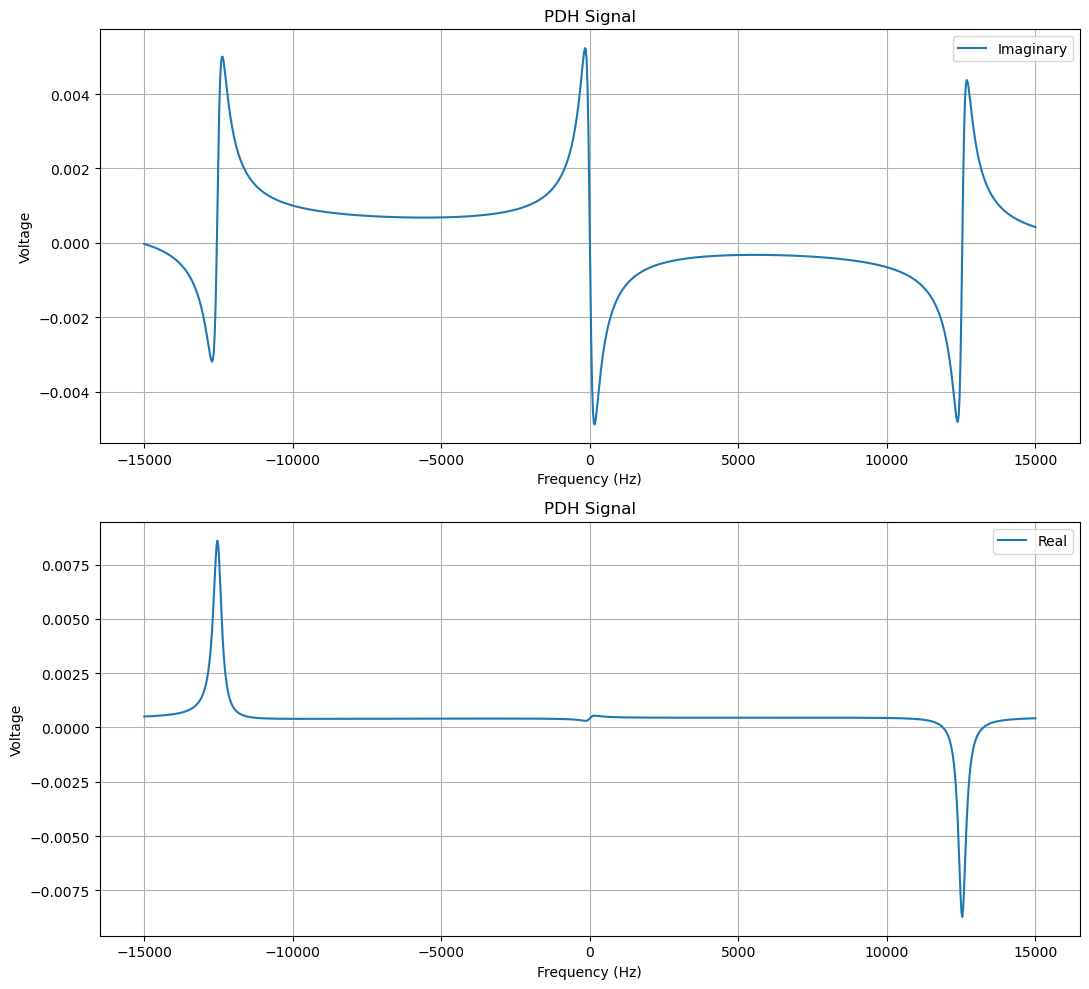

In [35]:
# Constants
J1 = Gamma / 2 
f = np.linspace(-15e3, 15e3, 1000) # larger freq range
fRF = 9e6 # sideband frequency

# Modulation of PRM
phi_p = ((2 * np.pi * f) / c) * Lp
phi_pRF = ((2 * np.pi * fRF) / c) * Lp

# Modulation of X-arm
theta_x = (2*np.pi*f*FPx)/3e8
theta_xRF = (2*np.pi*fRF*FPx)/3e8

phi_x = ((2 * np.pi * f) / c) * Lx
phi_xRF = ((2 * np.pi * fRF) / c) * Lx


# Modulation of Y-arm
theta_y = (2*np.pi*f*FPy)/3e8
theta_yRF = (2*np.pi*fRF*FPy)/3e8

phi_y = ((2 * np.pi * f) / c) * Ly
phi_yRF = ((2 * np.pi * fRF) / c) * Ly


r0c = np.conjugate(E_refl_func(phi_x, phi_y, phi_p, theta_x, theta_y))


def Prefl_im(A, B, zeta=0):
    # Calculate cos (with zeta=0)
    term1 = -2 * np.cos(zeta) * np.imag(A + B)
    term2 = -2 * np.real(A - B) * np.sin(zeta)
    
    return 0.5 * E0**2 * J0 * J1 * (term1 + term2)

def Prefl_re(A, B, zeta=0):
    # Calculate sin (with zeta=0)
    term1 = 2 * np.cos(zeta) * np.real(A - B)
    term2 = -2 * np.imag(A + B) * np.sin(zeta)
    
    return 0.5 * E0**2 * J0 * J1 * (term1 + term2)

# Plotting


# Phase Shift of PRM
phi_prm = phi_pRF  + phi_p # minus sideband
phi_prp = -phi_pRF  + phi_p # plus sideband

# Phase Shift of X-arm
phi_xrm =  phi_xRF +phi_x # minus sideband
phi_xrp = - -phi_xRF +phi_x   # plus sideband

# Phase Shift of Y-arm
phi_yrm =  phi_yRF +  phi_y # minus sideband
phi_yrp = - phi_yRF + phi_y # plus sideband

theta_xrm = theta_x + theta_xRF
theta_xrp = theta_x - theta_xRF

theta_yrm = theta_y + theta_yRF
theta_yrp = theta_y - theta_yRF

rmOmega = E_refl_func(phi_xrm, phi_yrm, phi_prm, theta_xrm, theta_yrm) # reflectivity minus
rpOmega = E_refl_func(phi_xrp, phi_yrp, phi_prp, theta_xrp, theta_yrp) # reflectivity plus

A = r0c * rmOmega
B = r0c * rpOmega

PreflOmega_cos_values = Prefl_im(A, B, zeta=0)
PreflOmega_sin_values = Prefl_re(A, B, zeta=0)


# Plotting
plt.figure(figsize=(11, 10))

# Plot PreflΩcos
plt.subplot(2, 1, 1)
plt.plot(f, P_in*PreflOmega_cos_values, label="Imaginary")
plt.title("PDH Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Voltage")
plt.legend()
plt.grid(True)

# Plot PreflΩsin
plt.subplot(2, 1, 2)
plt.plot(f, P_in*PreflOmega_sin_values, label="Real")
plt.title("PDH Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Voltage")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



### Shaking the positions of all mirrors

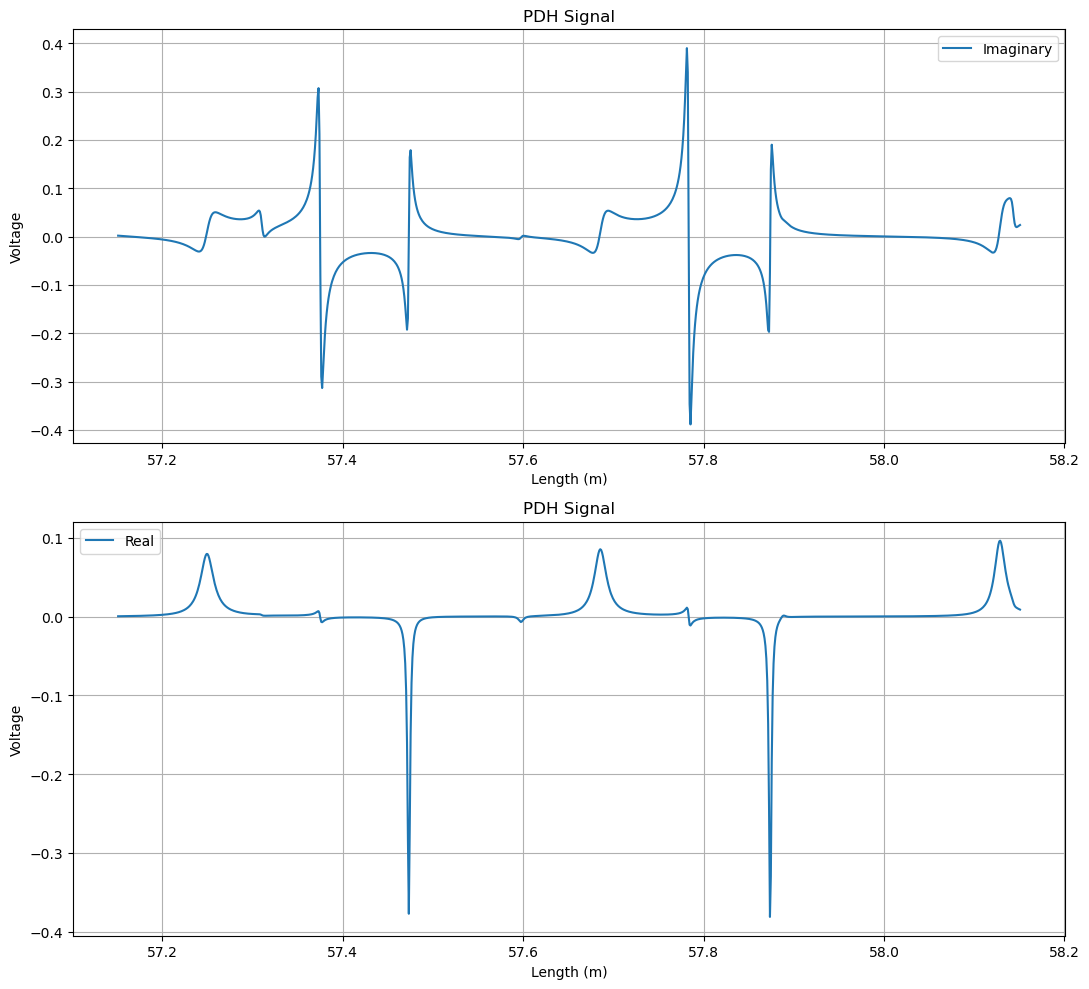

In [36]:
# Constants
J1 = Gamma / 2 
f = 180e6 # larger freq range
fRF = 9e6 # sideband frequency
Lp = 57.6508 # Length from PRM to BS 
Lx = 5 # l_x
Ly = 5
Lp = np.linspace(-0.5+57.6508, 0.5+57.6508, 1000)
Lx = np.linspace(-0.5+5, 0.5+5, 1000)
Ly = np.linspace(-0.5+5, 0.5+5, 1000)
FPx = np.linspace(-0.5+3994.5, 0.5+3994.5, 1000)
#FPx = 3994.17
#FPy = 3994.17
FPy = np.linspace(-0.5+3994.5, 0.5+3994.5, 1000)

# Modulation of PRM
phi_p = ((2 * np.pi * f) / c) * Lp
phi_pRF = ((2 * np.pi * fRF) / c) * Lp

# Modulation of X-arm
theta_x = (2*np.pi*f*FPx)/3e8
theta_xRF = (2*np.pi*fRF*FPx)/3e8

phi_x = ((2 * np.pi * f) / c) * Lx
phi_xRF = ((2 * np.pi * fRF) / c) * Lx


# Modulation of Y-arm
theta_y = (2*np.pi*f*FPy)/3e8
theta_yRF = (2*np.pi*fRF*FPy)/3e8

phi_y = ((2 * np.pi * f) / c) * Ly
phi_yRF = ((2 * np.pi * fRF) / c) * Ly


r0c = np.conjugate(E_refl_func(phi_x, phi_y, phi_p, theta_x, theta_y))
#r0c = np.conjugate(r_MI)

#print(E_refl_func(phi_x, phi_y, phi_p, theta_x, theta_y)) 

def Prefl_im(A, B, zeta=0):
    # Calculate cos (with zeta=0)
    term1 = -2 * np.cos(zeta) * np.imag(A + B)
    term2 = -2 * np.real(A - B) * np.sin(zeta)
    
    return 0.5 * E0**2 * J0 * J1 * (term1 + term2)

def Prefl_re(A, B, zeta=0):
    # Calculate sin (with zeta=0)
    term1 = 2 * np.cos(zeta) * np.real(A - B)
    term2 = -2 * np.imag(A + B) * np.sin(zeta)
    
    return 0.5 * E0**2 * J0 * J1 * (term1 + term2)



# Phase Shift of PRM
phi_prm = phi_pRF  + phi_p # minus sideband
phi_prp = -phi_pRF  + phi_p # plus sideband

# Phase Shift of X-arm
phi_xrm =  phi_xRF +phi_x # minus sideband
phi_xrp = - -phi_xRF +phi_x   # plus sideband

# Phase Shift of Y-arm
phi_yrm =  phi_yRF +  phi_y # minus sideband
phi_yrp = - phi_yRF + phi_y # plus sideband

theta_xrm = theta_x + theta_xRF
theta_xrp = theta_x - theta_xRF

theta_yrm = theta_y + theta_yRF
theta_yrp = theta_y - theta_yRF

rmOmega = E_refl_func(phi_xrm, phi_yrm, phi_prm, theta_xrm, theta_yrm) # reflectivity minus
rpOmega = E_refl_func(phi_xrp, phi_yrp, phi_prp, theta_xrp, theta_yrp) # reflectivity plus

A = r0c * rmOmega
B = r0c * rpOmega

PreflOmega_cos_values = Prefl_im(A, B, zeta=0)
PreflOmega_sin_values = Prefl_re(A, B, zeta=0)




# Plotting
plt.figure(figsize=(11, 10))

# Plot PreflΩcos
plt.subplot(2, 1, 1)
plt.plot(Lp, P_in*PreflOmega_cos_values, label="Imaginary")
plt.title("PDH Signal")
plt.xlabel("Length (m)")
plt.ylabel("Voltage")
plt.legend()
plt.grid(True)

# Plot PreflΩsin
plt.subplot(2, 1, 2)
plt.plot(Lp, P_in*PreflOmega_sin_values, label="Real")
plt.title("PDH Signal")
plt.xlabel("Length (m)")
plt.ylabel("Voltage")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



### Shaking the x and y arm in phase

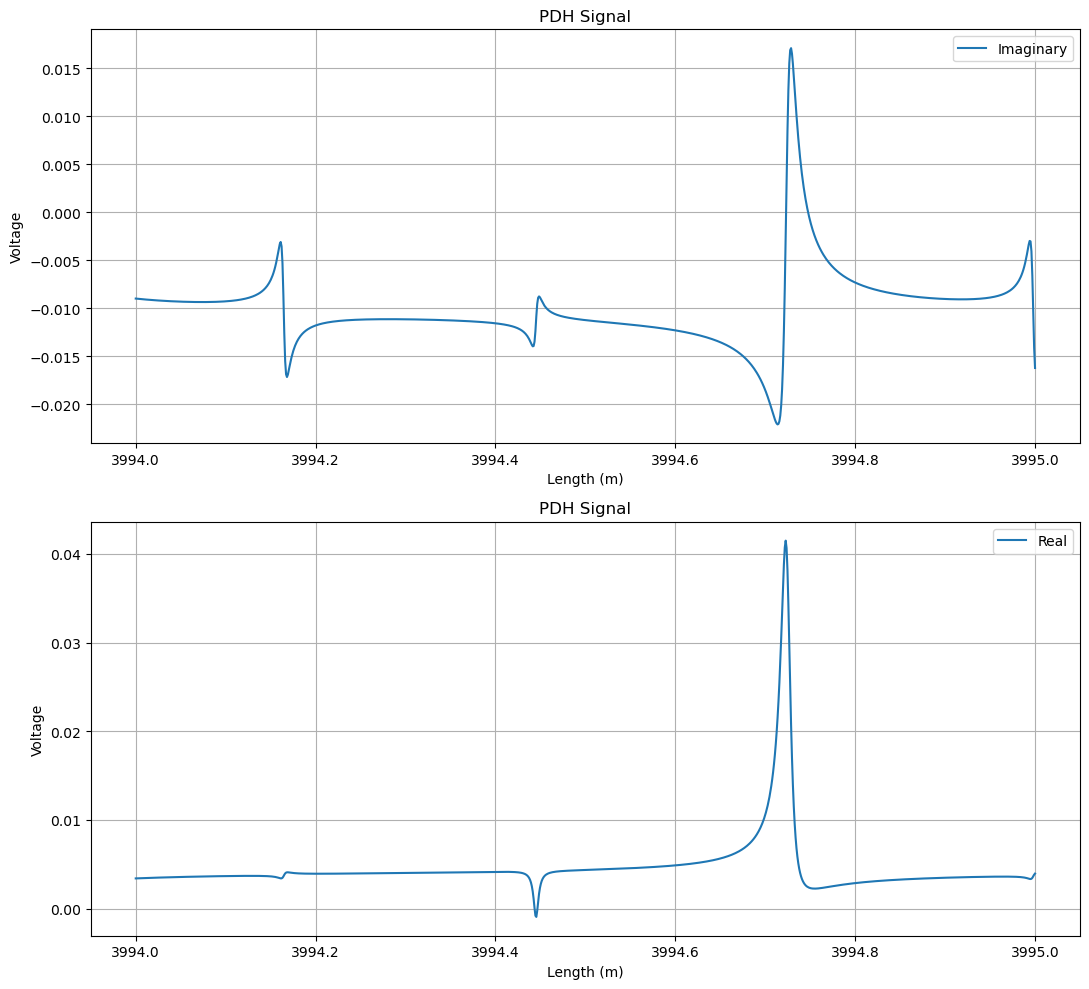

In [37]:
# Constants
J1 = Gamma / 2 
f = 180e6 # larger freq range
fRF = 9e6 # sideband frequency
Lp = 57.6508 # Length from PRM to BS 
Lx = 5 # l_x
Ly = 5
#Lp = np.linspace(-0.5+57.6508, 0.5+57.6508, 1000)
#Lx = np.linspace(-0.5+5, 0.5+5, 1000)
#Ly = np.linspace(-0.5+5, 0.5+5, 1000)
FPx = np.linspace(-0.5+3994.5, 0.5+3994.5, 1000)
#FPx = 3994.17
#FPy = 3994.17
FPy = np.linspace(-0.5+3994.5, 0.5+3994.5, 1000)

# Modulation of PRM
phi_p = ((2 * np.pi * f) / c) * Lp
phi_pRF = ((2 * np.pi * fRF) / c) * Lp

# Modulation of X-arm
theta_x = (2*np.pi*f*FPx)/3e8
theta_xRF = (2*np.pi*fRF*FPx)/3e8

phi_x = ((2 * np.pi * f) / c) * Lx
phi_xRF = ((2 * np.pi * fRF) / c) * Lx


# Modulation of Y-arm
theta_y = (2*np.pi*f*FPy)/3e8
theta_yRF = (2*np.pi*fRF*FPy)/3e8

phi_y = ((2 * np.pi * f) / c) * Ly
phi_yRF = ((2 * np.pi * fRF) / c) * Ly


r0c = np.conjugate(E_refl_func(phi_x, phi_y, phi_p, theta_x, theta_y))
#r0c = np.conjugate(r_MI)

#print(E_refl_func(phi_x, phi_y, phi_p, theta_x, theta_y)) 

def Prefl_im(A, B, zeta=0):
    # Calculate cos (with zeta=0)
    term1 = -2 * np.cos(zeta) * np.imag(A + B)
    term2 = -2 * np.real(A - B) * np.sin(zeta)
    
    return 0.5 * E0**2 * J0 * J1 * (term1 + term2)

def Prefl_re(A, B, zeta=0):
    # Calculate sin (with zeta=0)
    term1 = 2 * np.cos(zeta) * np.real(A - B)
    term2 = -2 * np.imag(A + B) * np.sin(zeta)
    
    return 0.5 * E0**2 * J0 * J1 * (term1 + term2)



# Phase Shift of PRM
phi_prm = phi_pRF  + phi_p # minus sideband
phi_prp = -phi_pRF  + phi_p # plus sideband

# Phase Shift of X-arm
phi_xrm =  phi_xRF +phi_x # minus sideband
phi_xrp = - -phi_xRF +phi_x   # plus sideband

# Phase Shift of Y-arm
phi_yrm =  phi_yRF +  phi_y # minus sideband
phi_yrp = - phi_yRF + phi_y # plus sideband

theta_xrm = theta_x + theta_xRF
theta_xrp = theta_x - theta_xRF

theta_yrm = theta_y + theta_yRF
theta_yrp = theta_y - theta_yRF

rmOmega = E_refl_func(phi_xrm, phi_yrm, phi_prm, theta_xrm, theta_yrm) # reflectivity minus
rpOmega = E_refl_func(phi_xrp, phi_yrp, phi_prp, theta_xrp, theta_yrp) # reflectivity plus

A = r0c * rmOmega
B = r0c * rpOmega

PreflOmega_cos_values = Prefl_im(A, B, zeta=0)
PreflOmega_sin_values = Prefl_re(A, B, zeta=0)




# Plotting
plt.figure(figsize=(11, 10))

# Plot PreflΩcos
plt.subplot(2, 1, 1)
plt.plot(FPx, P_in*PreflOmega_cos_values, label="Imaginary")
plt.title("PDH Signal")
plt.xlabel("Length (m)")
plt.ylabel("Voltage")
plt.legend()
plt.grid(True)

# Plot PreflΩsin
plt.subplot(2, 1, 2)
plt.plot(FPx, P_in*PreflOmega_sin_values, label="Real")
plt.title("PDH Signal")
plt.xlabel("Length (m)")
plt.ylabel("Voltage")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



### PDH signal from the transmitted PD

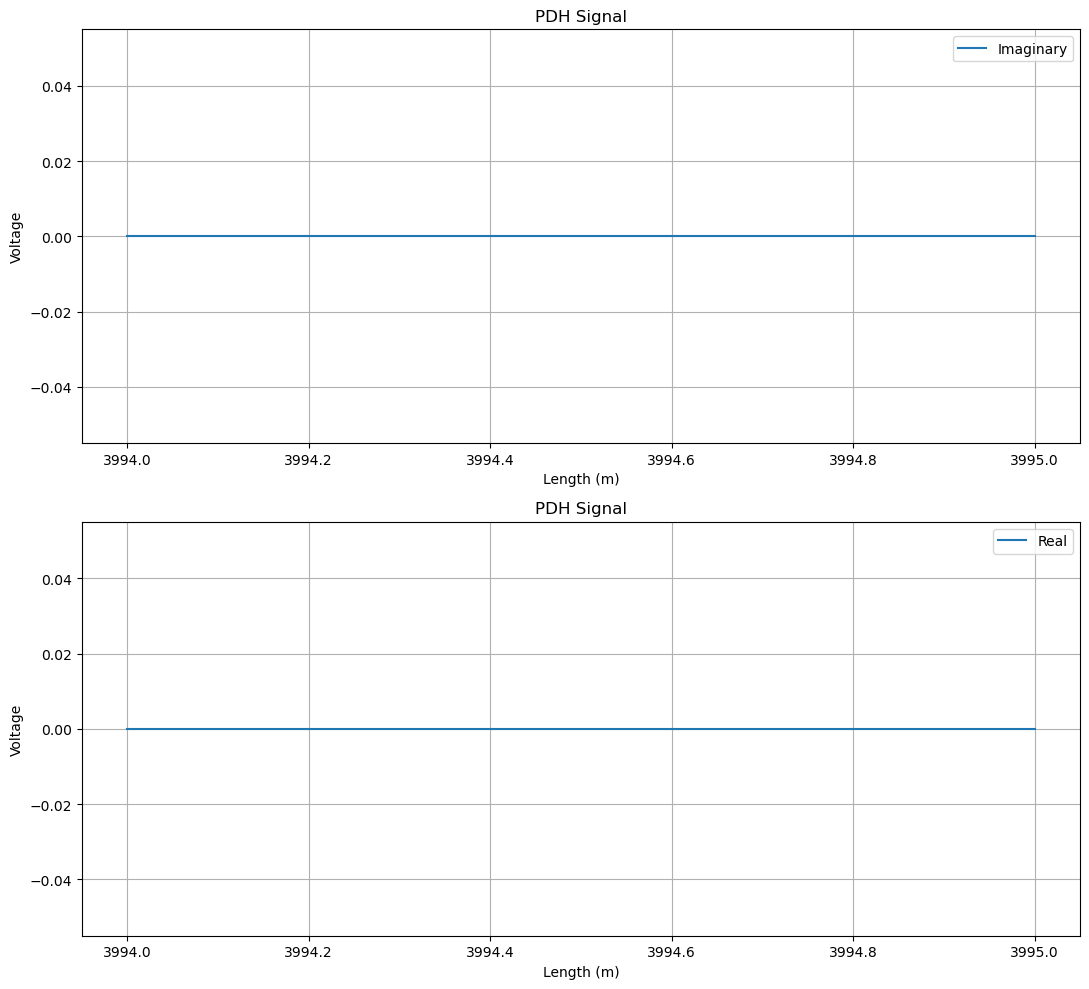

In [38]:
# Constants
J1 = Gamma / 2 
f = 180e6 # larger freq range
fRF = 9e6 # sideband frequency
Lp = 57.6508 # Length from PRM to BS 
Lx = 5 # l_x
Ly = 5
#Lp = np.linspace(-0.5+57.6508, 0.5+57.6508, 1000)
#Lx = np.linspace(-0.5+5, 0.5+5, 1000)
#Ly = np.linspace(-0.5+5, 0.5+5, 1000)
FPx = np.linspace(-0.5+3994.5, 0.5+3994.5, 1000)
#FPx = 3994.17
#FPy = 3994.17
FPy = np.linspace(-0.5+3994.5, 0.5+3994.5, 1000)

# Modulation of PRM
phi_p = ((2 * np.pi * f) / c) * Lp
phi_pRF = ((2 * np.pi * fRF) / c) * Lp

# Modulation of X-arm
theta_x = (2*np.pi*f*FPx)/3e8
theta_xRF = (2*np.pi*fRF*FPx)/3e8

phi_x = ((2 * np.pi * f) / c) * Lx
phi_xRF = ((2 * np.pi * fRF) / c) * Lx


# Modulation of Y-arm
theta_y = (2*np.pi*f*FPy)/3e8
theta_yRF = (2*np.pi*fRF*FPy)/3e8

phi_y = ((2 * np.pi * f) / c) * Ly
phi_yRF = ((2 * np.pi * fRF) / c) * Ly

r1 = r_1
r2 = r_2
#r3 = r_3
#r4 = r_4
t1 = t_1
t2 = t_2
#t3 = t_3
#t4 = t_4

def E_refl_func(phi_x,phi_y,phi_p, theta_x, theta_y) :
    q1 = (-r3 + r4 * np.exp(2j*theta_x))/(1 - r3 * r4 * np.exp(2j*theta_x))
    q2 = (-r3+ r4 * np.exp(2j*theta_y))/(1 - r3 * r4 * np.exp(2j*theta_y))
    
    denom = r_1*r_2**2*q2*np.exp(2j*(phi_p+phi_y))+r_1*q1*t_2**2*np.exp(2j*(phi_p+phi_x))-1
    num = r_2*t_1*t_2*(q1*np.exp(1j*(phi_p+2*phi_x)) - q2*np.exp(1j*(phi_p+2*phi_y)))
                         
    return num/denom

r0c = np.conjugate(E_refl_func(phi_x, phi_y, phi_p, theta_x, theta_y))
#r0c = np.conjugate(r_MI)

#print(E_refl_func(phi_x, phi_y, phi_p, theta_x, theta_y)) 

def Prefl_im(A, B, zeta=0):
    # Calculate cos (with zeta=0)
    term1 = -2 * np.cos(zeta) * np.imag(A + B)
    term2 = -2 * np.real(A - B) * np.sin(zeta)
    
    return 0.5 * E0**2 * J0 * J1 * (term1 + term2)

def Prefl_re(A, B, zeta=0):
    # Calculate sin (with zeta=0)
    term1 = 2 * np.cos(zeta) * np.real(A - B)
    term2 = -2 * np.imag(A + B) * np.sin(zeta)
    
    return 0.5 * E0**2 * J0 * J1 * (term1 + term2)



# Phase Shift of PRM
phi_prm = phi_pRF  + phi_p # minus sideband
phi_prp = -phi_pRF  + phi_p # plus sideband

# Phase Shift of X-arm
phi_xrm =  phi_xRF +phi_x # minus sideband
phi_xrp = - -phi_xRF +phi_x   # plus sideband

# Phase Shift of Y-arm
phi_yrm =  phi_yRF +  phi_y # minus sideband
phi_yrp = - phi_yRF + phi_y # plus sideband

theta_xrm = theta_x + theta_xRF
theta_xrp = theta_x - theta_xRF

theta_yrm = theta_y + theta_yRF
theta_yrp = theta_y - theta_yRF

rmOmega = E_refl_func(phi_xrm, phi_yrm, phi_prm, theta_xrm, theta_yrm) # reflectivity minus
rpOmega = E_refl_func(phi_xrp, phi_yrp, phi_prp, theta_xrp, theta_yrp) # reflectivity plus

A = r0c * rmOmega
B = r0c * rpOmega

PreflOmega_cos_values = Prefl_im(A, B, zeta=0)
PreflOmega_sin_values = Prefl_re(A, B, zeta=0)




# Plotting
plt.figure(figsize=(11, 10))

# Plot PreflΩcos
plt.subplot(2, 1, 1)
plt.plot(FPx, P_in*PreflOmega_cos_values, label="Imaginary")
plt.title("PDH Signal")
plt.xlabel("Length (m)")
plt.ylabel("Voltage")
plt.legend()
plt.grid(True)

# Plot PreflΩsin
plt.subplot(2, 1, 2)
plt.plot(FPx, P_in*PreflOmega_sin_values, label="Real")
plt.title("PDH Signal")
plt.xlabel("Length (m)")
plt.ylabel("Voltage")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

